# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


pd.options.display.float_format = '{:.5f}'.format

data = pd.read_csv('C:/Users/ke620/Downloads/real_estate_data.csv')
data.head()

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


В датасете данные склеены в одну строку. Разделим данные по колонкам (передадим функции read_csv аргумент sep=\t):

In [2]:
data = pd.read_csv('C:/Users/ke620/Downloads/real_estate_data.csv', sep='\t')
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.00000,108.00000,2019-03-07T00:00:00,3,2.70000,16.00000,51.00000,8,NaN,...,25.00000,NaN,Санкт-Петербург,18863.00000,16028.00000,1.00000,482.00000,2.00000,755.00000,NaN
1,7,3350000.00000,40.40000,2018-12-04T00:00:00,1,NaN,11.00000,18.60000,1,NaN,...,11.00000,2.00000,посёлок Шушары,12817.00000,18603.00000,0.00000,NaN,0.00000,NaN,81.00000
2,10,5196000.00000,56.00000,2015-08-20T00:00:00,2,NaN,5.00000,34.30000,4,NaN,...,8.30000,0.00000,Санкт-Петербург,21741.00000,13933.00000,1.00000,90.00000,2.00000,574.00000,558.00000
3,0,64900000.00000,159.00000,2015-07-24T00:00:00,3,NaN,14.00000,NaN,9,NaN,...,NaN,0.00000,Санкт-Петербург,28098.00000,6800.00000,2.00000,84.00000,3.00000,234.00000,424.00000
4,2,10000000.00000,100.00000,2018-06-19T00:00:00,2,3.03000,14.00000,32.00000,13,NaN,...,41.00000,NaN,Санкт-Петербург,31856.00000,8098.00000,2.00000,112.00000,1.00000,48.00000,121.00000
5,10,2890000.00000,30.40000,2018-09-10T00:00:00,1,NaN,12.00000,14.40000,5,NaN,...,9.10000,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.00000
6,6,3700000.00000,37.30000,2017-11-02T00:00:00,1,NaN,26.00000,10.60000,6,NaN,...,14.40000,1.00000,посёлок Парголово,52996.00000,19143.00000,0.00000,NaN,0.00000,NaN,155.00000
7,5,7915000.00000,71.60000,2019-04-18T00:00:00,2,NaN,24.00000,NaN,22,NaN,...,18.90000,2.00000,Санкт-Петербург,23982.00000,11634.00000,0.00000,NaN,0.00000,NaN,NaN
8,20,2900000.00000,33.16000,2018-05-23T00:00:00,1,NaN,27.00000,15.43000,26,NaN,...,8.81000,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00000
9,18,5400000.00000,61.00000,2017-02-26T00:00:00,3,2.50000,9.00000,43.60000,7,NaN,...,6.50000,2.00000,Санкт-Петербург,50898.00000,15008.00000,0.00000,NaN,0.00000,NaN,289.00000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В датасете содержится общее количество объявлений о продаже квартир - 23699 шт.
Представлены данные не в полном объеме по следующим колонкам таблицы:

   1) по данным, добавленным пользователем по объекту недвижимости:
    ceiling_height - высота потолков;
    floors_total - всего этажей в доме;
    living_area - жилая площадь в кв.м;
    is_apartment - аппартаменты;
    balcony - число балконов;
    locality_name - название населенного пункта.

   2) по картографическим данным объекта недвижимости:
    airports_nearest - расстояние до ближайщего аэропорта  в м;
    cityCenters_nearest - расстояние до центра города в м;
    parks_around3000 - число парков в радиусе 3 км;
    ponds_nearest - расстояние до ближайщего водоема в м;

   3) по данным о количестве дней размещения публикации о продаже объекта недвижимости в сервисе:
    days_exposition - сколько дней было размещено объявление (от публикации до снятия).

Также из общей информации по датасету видим наличие двух стл., содержащих информацию с характеристиками объекта недвижимости - является ли объект квартирой-студией (стл.'studio') и наличие свободной планировки (стл. 'open_plan'). По этим колонкам, представленным булевым массивом, есть все данные. Дополнительно отметим: к булеву типу относится также стл.'is_apartment' (аппартаменты), но данные в этом стл. представлены в виде object (не булевым значением).


Построим общую гистограмму для всех числовых столбцов табл.:

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

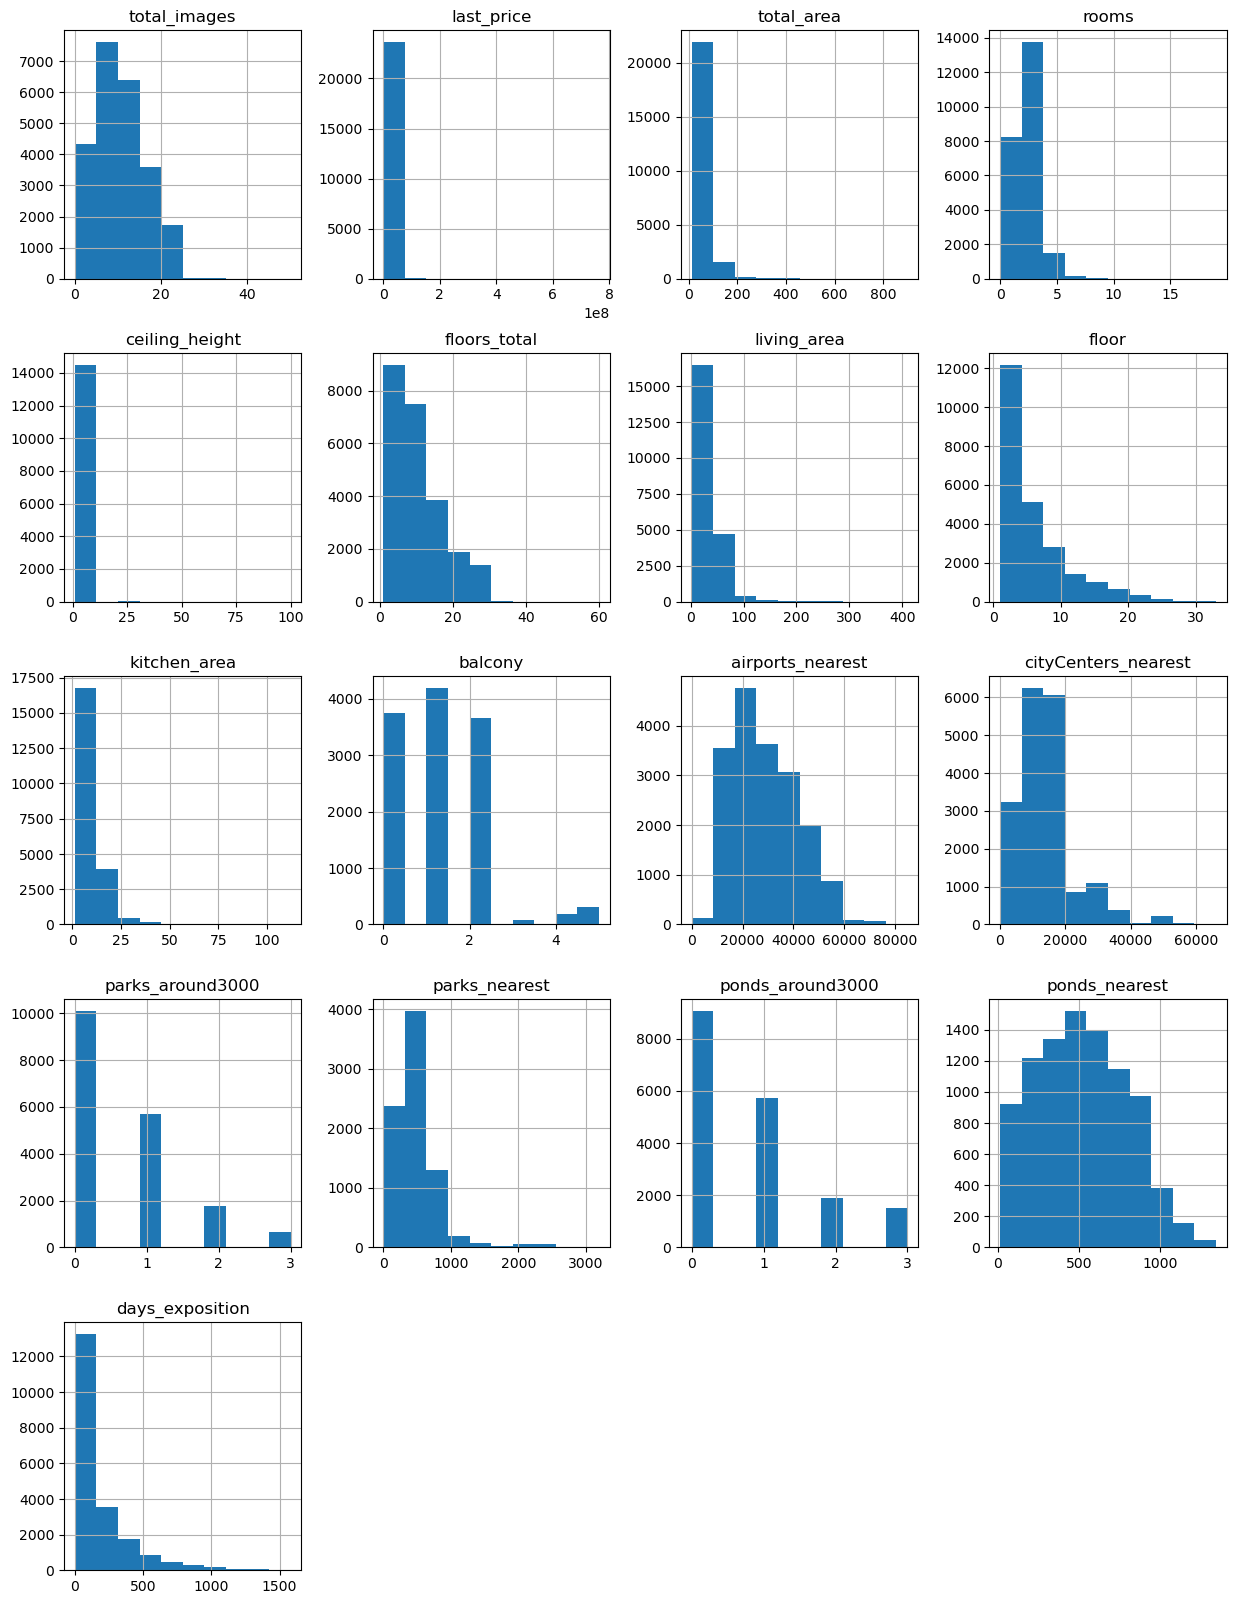

In [4]:
data.hist(figsize=(15,20))

Из всех выше представленных гистограмм - самая непонятная и нечитаемая гистограмма в данных по стл.last_price (последняя цена).


### Предобработка данных


Для корректной обработки данных и обоснования дальнейших выводов определим цель и гипотезы нашего исследования:

Цель исследования - установить зависимость между стоимостью объекта недвижимости и парамтерами, характеризующими объект недвижимости.

Наибольшее влияние на стоимость объекта недвижимости оказывают такие факторы, как:

   •	общая площадь, жилая площадь объекта, площадь кухни;
   
   •	характеристика жилого фонда, к которому относится объект недвижимости (например, вторичное жилье, новостройки);
   
   •	место расположения объекта (городская - сельская местность, расстояние до центра города для городской местности);
   
   •	наличие инфраструктуры (транспортная развязка, развитая социальная инфраструктура, наличие зоны отдыха и т.п.).
   
Из представленных в датасете данных необходимо определить, какие факторы больше всего влияют на стоимость объекта: общая, жилая площади, площадь кухни, количество комнат, этаж расположения объекта, расстояние до центра города и др. 

Для начала необходимо выявить и устранить имеющиеся проблемы в данных.


In [5]:
# выведем общее количество пропусков в табл. по колонкам:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Проанализируем данные по столбцам, в которых имеются пропущенные значения или в которых требуется изменить тип данных:

   - в стл. ceiling_height (высота потолка) (тип данных: float) - пропущено более 1/3 значений. Скорее всего, данные были пропущены самим пользователем по причине либо отсутствия информации, либо по причине того, что высота потолка - это характеристика, определяемая типовым проектом строительства жилья. 

   - в стл. floors_total (всего этажей)(тип данных: float) - пропущенных значений мало, пропуски допущены самим пользователем, информация по этому параметру может быть легко получена любым пользователем при обращении к адресу объекта. 
   
   - в стл. living_area (жилая площадь) (тип данных: float) - доля пропущенных значений невелика (8%), данные пропущены самим пользователем по неизвестной причине. 

   - в стл. is_apartment (аппартаменты)(тип данных: object, по описанию данных - должен быть булев тип) - пропущенных значений много (почти 90%), причина пропуска неизвестна. Так как пропущенных значений очень много, а внесение изменений (например, замена пропусков на ноль или др.значение) или приведение данных к типу bool - приводит к значительному искажению первоначальных данных (резко увеличивается либо False, либо True), то оставим данный стл. без изменений.

   - в стл. kitchen_area (площадь кухни) (тип данных: float) - доля пропущенных значений составляет 10%, данные пропущены самим пользователем по неизвестной причине. 

   - в стл. balcony (количество балконов) (тип данных: float) - пропущена почти половина значений. Скорее всего, данные не были заполнены самим пользователем по причине отсутствия балконов у объекта недвижимости. 

   - в стл. locality_name (название населенного пункта) (тип данных: object) - пропусков мало, пропуски допущены самим пользователем по неизвестной причине, данные в этом стл. необходимо проверить на наличие дубликатов.

   - в стл. по картографическим данным объекта (тип у всех данных: float), таких как airports_nearest (расстояние до ближайщего аэропорта), cityCenters_nearest (расстояние до центра города), parks_around3000 (число парков в радиусе 3 км), ponds_around3000 (число водоемов в радиусе 3 км) - пропущенных значений примерно одинаково (около 1/5). Возможная причина пропуска - к объекту недвижимости неприменимы данные характеристики (например, отсутствие аэропорта, объект находится вне городской местности). 

   - в оставшихся стл. по картографическим данным объекта (тип данных: float), таких как parks_nearest (расстояние до ближайщего парка), ponds_nearest (расстояние до ближайщего водоема) - пропущенных значений примерно одинаково (более 1/2 данных), возможная причина пропуска данных аналогична предыдущему пункту.

   - в стл. days_exposition (количество дней размещения объявления) (тип данных: float) - доля пропущенных значений составляет 13%, причина пропуска - неизвестна, возможна проблема выгрузки данных (автоматическое заполнение с момента снятия публикации).

   - стл. first_day_exposition (дата публикации) (тип данных: object) приведем к типу datetime.

Проанализируем данные по столбцам на наличие выбивающихся, аномальных значений:


In [6]:
# отсортируем стл. "высота потолка" с помощью метода sort_values по убыванию 
# и выведим первые 10 строк:
data.sort_values('ceiling_height', ascending=False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22869,0,15000000.00000,25.00000,2018-07-25T00:00:00,1,100.00000,5.00000,14.00000,5,True,...,11.00000,5.00000,Санкт-Петербург,34963.00000,8283.00000,1.00000,223.00000,3.00000,30.00000,19.00000
22336,19,9999000.00000,92.40000,2019-04-05T00:00:00,2,32.00000,6.00000,55.50000,5,False,...,16.50000,4.00000,Санкт-Петербург,18838.00000,3506.00000,0.00000,NaN,3.00000,511.00000,NaN
3148,14,2900000.00000,75.00000,2018-11-12T00:00:00,3,32.00000,3.00000,53.00000,2,NaN,...,8.00000,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21377,19,4900000.00000,42.00000,2017-04-18T00:00:00,1,27.50000,24.00000,37.70000,19,False,...,11.00000,2.00000,Санкт-Петербург,42742.00000,9760.00000,0.00000,NaN,0.00000,NaN,61.00000
20478,11,8000000.00000,45.00000,2017-07-18T00:00:00,1,27.00000,4.00000,22.00000,2,NaN,...,10.00000,1.00000,Санкт-Петербург,18975.00000,3246.00000,0.00000,NaN,3.00000,449.00000,429.00000
5246,0,2500000.00000,54.00000,2017-10-13T00:00:00,2,27.00000,5.00000,30.00000,3,NaN,...,9.00000,2.00000,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.00000
5807,17,8150000.00000,80.00000,2019-01-09T00:00:00,2,27.00000,36.00000,41.00000,13,NaN,...,12.00000,5.00000,Санкт-Петербург,18732.00000,20444.00000,0.00000,NaN,3.00000,80.00000,38.00000
10773,8,3800000.00000,58.00000,2017-10-13T00:00:00,2,27.00000,10.00000,30.10000,3,False,...,8.10000,2.00000,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,71.00000
17857,1,3900000.00000,56.00000,2017-12-22T00:00:00,3,27.00000,5.00000,33.00000,4,False,...,NaN,NaN,Санкт-Петербург,41030.00000,15543.00000,0.00000,NaN,0.00000,NaN,73.00000
22938,14,4000000.00000,98.00000,2018-03-15T00:00:00,4,27.00000,2.00000,73.00000,2,True,...,9.00000,1.00000,деревня Нижняя,NaN,NaN,NaN,NaN,NaN,NaN,27.00000


In [7]:
# посмотрим информацию по объектам недвижимости с аномальными значениями
# по стл."высота потолка" (>= 20 м):
data[data['ceiling_height'] >= 20].sort_values('ceiling_height', ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22869,0,15000000.00000,25.00000,2018-07-25T00:00:00,1,100.00000,5.00000,14.00000,5,True,...,11.00000,5.00000,Санкт-Петербург,34963.00000,8283.00000,1.00000,223.00000,3.00000,30.00000,19.00000
22336,19,9999000.00000,92.40000,2019-04-05T00:00:00,2,32.00000,6.00000,55.50000,5,False,...,16.50000,4.00000,Санкт-Петербург,18838.00000,3506.00000,0.00000,NaN,3.00000,511.00000,NaN
3148,14,2900000.00000,75.00000,2018-11-12T00:00:00,3,32.00000,3.00000,53.00000,2,NaN,...,8.00000,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21377,19,4900000.00000,42.00000,2017-04-18T00:00:00,1,27.50000,24.00000,37.70000,19,False,...,11.00000,2.00000,Санкт-Петербург,42742.00000,9760.00000,0.00000,NaN,0.00000,NaN,61.00000
22938,14,4000000.00000,98.00000,2018-03-15T00:00:00,4,27.00000,2.00000,73.00000,2,True,...,9.00000,1.00000,деревня Нижняя,NaN,NaN,NaN,NaN,NaN,NaN,27.00000
17857,1,3900000.00000,56.00000,2017-12-22T00:00:00,3,27.00000,5.00000,33.00000,4,False,...,NaN,NaN,Санкт-Петербург,41030.00000,15543.00000,0.00000,NaN,0.00000,NaN,73.00000
4876,7,3000000.00000,25.00000,2017-09-27T00:00:00,0,27.00000,25.00000,17.00000,17,NaN,...,NaN,2.00000,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.00000
5246,0,2500000.00000,54.00000,2017-10-13T00:00:00,2,27.00000,5.00000,30.00000,3,NaN,...,9.00000,2.00000,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.00000
5807,17,8150000.00000,80.00000,2019-01-09T00:00:00,2,27.00000,36.00000,41.00000,13,NaN,...,12.00000,5.00000,Санкт-Петербург,18732.00000,20444.00000,0.00000,NaN,3.00000,80.00000,38.00000
21824,20,2450000.00000,44.00000,2019-02-12T00:00:00,2,27.00000,2.00000,38.00000,2,False,...,8.60000,2.00000,городской поселок Большая Ижора,NaN,NaN,NaN,NaN,NaN,NaN,NaN


В стл. ceiling_height (высота потолка) значения в диапазоне от 22.6 до 32.0, 100.0 скорее всего были внесены некорректно, поэтому преобразуем эти данные к корректному виду:

In [8]:
# заменим аномальные значения в стл."высота потолка": 
# в стл.ceiling_height все значения высоты (h>=20) заменим на значения h/10 

data['ceiling_height'] = data['ceiling_height'].apply(lambda h: h/10 if h>=20 else h)    

# после преобразований отсортируем значения по стл."высота потолка" по убыванию:
data.sort_values('ceiling_height', ascending=False).head() 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
15061,19,5600000.00000,56.40000,2018-05-11T00:00:00,2,14.00000,14.00000,32.40000,5,NaN,...,9.10000,2.00000,Санкт-Петербург,14814.00000,13610.00000,0.00000,NaN,0.00000,NaN,315.00000
22309,20,5300000.00000,45.00000,2017-09-30T00:00:00,1,10.30000,16.00000,15.50000,15,NaN,...,NaN,NaN,Санкт-Петербург,36353.00000,11936.00000,2.00000,440.00000,2.00000,450.00000,136.00000
22869,0,15000000.00000,25.00000,2018-07-25T00:00:00,1,10.00000,5.00000,14.00000,5,True,...,11.00000,5.00000,Санкт-Петербург,34963.00000,8283.00000,1.00000,223.00000,3.00000,30.00000,19.00000
5863,20,5650000.00000,45.00000,2018-08-15T00:00:00,1,8.30000,16.00000,19.30000,14,NaN,...,8.30000,1.00000,Санкт-Петербург,13069.00000,10763.00000,0.00000,NaN,1.00000,613.00000,14.00000
3474,3,1400000.00000,30.00000,2018-03-16T00:00:00,1,8.00000,5.00000,15.30000,2,False,...,7.30000,NaN,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,125.00000


In [9]:
# посмотрим количество объектов недвижимости с выбивающимися значениями 
# по высоте потолка - менее 2м или более 8м:
data[(data['ceiling_height'] <= 2) | (data['ceiling_height'] >= 8)]


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
552,11,2999000.00000,33.50000,2017-03-30T00:00:00,1,2.00000,15.00000,17.50000,6,NaN,...,6.50000,NaN,Санкт-Петербург,33972.00000,11746.00000,1.00000,520.00000,1.00000,949.00000,270.00000
2572,4,2400000.00000,62.00000,2018-12-27T00:00:00,3,2.00000,5.00000,40.00000,4,NaN,...,6.00000,1.00000,Луга,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3474,3,1400000.00000,30.00000,2018-03-16T00:00:00,1,8.00000,5.00000,15.30000,2,False,...,7.30000,NaN,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,125.00000
4212,1,2120000.00000,35.43000,2017-12-18T00:00:00,1,2.00000,18.00000,16.60000,9,NaN,...,8.80000,2.00000,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,36.00000
5712,5,1500000.00000,42.80000,2017-08-14T00:00:00,2,1.20000,2.00000,27.50000,1,NaN,...,5.20000,NaN,городской посёлок Мга,NaN,NaN,NaN,NaN,NaN,NaN,248.00000
5850,9,1650000.00000,35.50000,2018-05-29T00:00:00,1,2.00000,5.00000,NaN,5,NaN,...,NaN,NaN,Луга,NaN,NaN,NaN,NaN,NaN,NaN,100.00000
5863,20,5650000.00000,45.00000,2018-08-15T00:00:00,1,8.30000,16.00000,19.30000,14,NaN,...,8.30000,1.00000,Санкт-Петербург,13069.00000,10763.00000,0.00000,NaN,1.00000,613.00000,14.00000
11352,4,3300000.00000,36.00000,2017-06-18T00:00:00,1,2.00000,17.00000,15.20000,12,NaN,...,10.10000,0.00000,посёлок Металлострой,25268.00000,26980.00000,0.00000,NaN,0.00000,NaN,53.00000
15061,19,5600000.00000,56.40000,2018-05-11T00:00:00,2,14.00000,14.00000,32.40000,5,NaN,...,9.10000,2.00000,Санкт-Петербург,14814.00000,13610.00000,0.00000,NaN,0.00000,NaN,315.00000
15743,14,5600000.00000,67.00000,2016-11-11T00:00:00,3,8.00000,16.00000,41.00000,1,NaN,...,8.00000,NaN,Санкт-Петербург,32691.00000,11035.00000,1.00000,723.00000,0.00000,NaN,474.00000


In [10]:
# найдем медианное значение по стл.ceiling_height:
data['ceiling_height'].median()

2.65

In [11]:
# заменим выбивающиеся значения по высоте потолков медианным значением по стл.ceiling_height:
data.loc[(data['ceiling_height'] <= 2) | (data['ceiling_height'] >= 8),
         'ceiling_height'] = 2.65
data.sort_values('ceiling_height', ascending=False).head(10) 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
20264,17,119000000.00000,187.60000,2017-07-10T00:00:00,4,6.00000,7.00000,147.00000,7,NaN,...,15.60000,NaN,Санкт-Петербург,26902.00000,5605.00000,3.00000,484.00000,1.00000,305.00000,259.00000
21227,0,8200000.00000,71.00000,2017-07-21T00:00:00,0,5.80000,5.00000,68.00000,5,NaN,...,NaN,0.00000,Санкт-Петербург,20170.00000,1261.00000,2.00000,295.00000,3.00000,366.00000,30.00000
1388,20,59800000.00000,399.00000,2015-01-21T00:00:00,5,5.60000,6.00000,NaN,6,NaN,...,NaN,0.00000,Санкт-Петербург,26204.00000,6934.00000,2.00000,149.00000,2.00000,577.00000,719.00000
7578,17,38000000.00000,143.00000,2017-11-02T00:00:00,3,5.50000,5.00000,83.00000,5,NaN,...,29.00000,1.00000,Санкт-Петербург,26333.00000,6448.00000,3.00000,479.00000,0.00000,NaN,NaN
1026,20,155000000.00000,310.00000,2018-10-12T00:00:00,5,5.30000,3.00000,190.00000,3,NaN,...,63.00000,2.00000,Санкт-Петербург,24899.00000,4785.00000,0.00000,NaN,1.00000,603.00000,NaN
12628,14,3900000.00000,50.00000,2018-03-29T00:00:00,1,5.30000,5.00000,NaN,5,NaN,...,NaN,NaN,Санкт-Петербург,19644.00000,3918.00000,1.00000,505.00000,1.00000,92.00000,8.00000
464,15,66571000.00000,280.30000,2015-06-11T00:00:00,6,5.20000,8.00000,159.50000,7,NaN,...,21.10000,0.00000,Санкт-Петербург,26316.00000,6655.00000,3.00000,187.00000,1.00000,616.00000,578.00000
1053,13,550000.00000,29.00000,2018-02-01T00:00:00,1,5.00000,3.00000,NaN,1,False,...,NaN,NaN,Бокситогорск,NaN,NaN,NaN,NaN,NaN,NaN,6.00000
21923,10,115490000.00000,235.00000,2017-04-09T00:00:00,5,4.90000,5.00000,140.00000,5,NaN,...,50.00000,NaN,Санкт-Петербург,22777.00000,1328.00000,3.00000,652.00000,3.00000,253.00000,351.00000
2802,7,14950000.00000,50.00000,2016-03-06T00:00:00,2,4.80000,3.00000,30.00000,2,NaN,...,10.00000,0.00000,Санкт-Петербург,24433.00000,1725.00000,1.00000,589.00000,3.00000,161.00000,160.00000


In [12]:
data.loc[data['ceiling_height'] >= 4]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
154,1,8200000.00000,80.00000,2018-11-06T00:00:00,3,4.15000,3.00000,44.20000,2,NaN,...,12.20000,NaN,Санкт-Петербург,20562.00000,3167.00000,2.00000,344.00000,1.00000,838.00000,38.00000
179,5,14800000.00000,108.70000,2019-04-11T00:00:00,3,4.00000,5.00000,72.40000,5,NaN,...,8.00000,NaN,Санкт-Петербург,23017.00000,2559.00000,1.00000,559.00000,0.00000,NaN,NaN
464,15,66571000.00000,280.30000,2015-06-11T00:00:00,6,5.20000,8.00000,159.50000,7,NaN,...,21.10000,0.00000,Санкт-Петербург,26316.00000,6655.00000,3.00000,187.00000,1.00000,616.00000,578.00000
1026,20,155000000.00000,310.00000,2018-10-12T00:00:00,5,5.30000,3.00000,190.00000,3,NaN,...,63.00000,2.00000,Санкт-Петербург,24899.00000,4785.00000,0.00000,NaN,1.00000,603.00000,NaN
1053,13,550000.00000,29.00000,2018-02-01T00:00:00,1,5.00000,3.00000,NaN,1,False,...,NaN,NaN,Бокситогорск,NaN,NaN,NaN,NaN,NaN,NaN,6.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21923,10,115490000.00000,235.00000,2017-04-09T00:00:00,5,4.90000,5.00000,140.00000,5,NaN,...,50.00000,NaN,Санкт-Петербург,22777.00000,1328.00000,3.00000,652.00000,3.00000,253.00000,351.00000
22055,2,8550000.00000,75.10000,2017-08-09T00:00:00,3,4.20000,6.00000,52.50000,3,NaN,...,8.00000,NaN,Санкт-Петербург,23060.00000,2602.00000,1.00000,584.00000,0.00000,NaN,477.00000
22083,7,2250000.00000,39.50000,2017-10-27T00:00:00,1,4.00000,5.00000,25.00000,5,NaN,...,5.20000,NaN,посёлок городского типа Рощино,NaN,NaN,NaN,NaN,NaN,NaN,312.00000
22494,7,91075000.00000,491.00000,2017-05-27T00:00:00,5,4.20000,9.00000,274.00000,9,NaN,...,45.00000,0.00000,Санкт-Петербург,25525.00000,5845.00000,2.00000,116.00000,0.00000,NaN,115.00000


Мы видим, что в стл.'ceiling_height' остались еще объекты недвижимости с высотой потолков от 4 м до 6 м (доля таких объектов составляет 0.4%), оставим эти строки без изменения по следующей причине:
в число этих объектов могут попадать квартиры из старого жилого фонда г.Санкт-Петербурга (для которых характерно наличие высоких потолков), а также могут попадать современные двухуровневые квартиры с высокими потолками.

In [13]:
# посмотрим пропущенные значения в стл."название населенного пункта":
data[data['locality_name'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1097,3,8600000.00000,81.70000,2016-04-15T00:00:00,3,3.55000,5.00000,50.80000,2,NaN,...,8.80000,0.00000,NaN,23478.00000,4258.00000,0.00000,NaN,0.00000,NaN,147.00000
2033,6,5398000.00000,80.00000,2017-05-30T00:00:00,3,NaN,4.00000,42.60000,2,NaN,...,18.60000,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.00000
2603,20,3351765.00000,42.70000,2015-09-20T00:00:00,1,NaN,24.00000,15.60000,3,NaN,...,10.70000,0.00000,NaN,22041.00000,17369.00000,0.00000,NaN,1.00000,374.00000,276.00000
2632,2,5130593.00000,62.40000,2015-10-11T00:00:00,2,NaN,24.00000,33.10000,21,NaN,...,8.20000,0.00000,NaN,22041.00000,17369.00000,0.00000,NaN,1.00000,374.00000,256.00000
3574,10,4200000.00000,46.50000,2016-05-28T00:00:00,2,NaN,5.00000,30.80000,5,NaN,...,6.50000,0.00000,NaN,27419.00000,8127.00000,0.00000,NaN,1.00000,603.00000,45.00000
4151,17,17600000.00000,89.50000,2014-12-09T00:00:00,2,3.00000,8.00000,39.62000,7,NaN,...,13.38000,0.00000,NaN,25054.00000,3902.00000,1.00000,485.00000,3.00000,722.00000,869.00000
4189,7,9200000.00000,80.00000,2015-12-10T00:00:00,3,4.00000,4.00000,52.30000,3,False,...,10.40000,0.00000,NaN,21774.00000,3039.00000,1.00000,690.00000,1.00000,953.00000,223.00000
4670,1,5500000.00000,83.00000,2015-08-14T00:00:00,3,NaN,7.00000,NaN,6,NaN,...,NaN,0.00000,NaN,26534.00000,5382.00000,1.00000,446.00000,1.00000,376.00000,350.00000
5343,19,13540000.00000,85.50000,2016-01-20T00:00:00,3,NaN,7.00000,59.10000,5,False,...,8.30000,4.00000,NaN,10556.00000,9538.00000,1.00000,67.00000,0.00000,NaN,303.00000
5707,7,3700000.00000,30.00000,2016-04-29T00:00:00,1,NaN,24.00000,20.00000,23,NaN,...,NaN,0.00000,NaN,21460.00000,16788.00000,0.00000,NaN,1.00000,170.00000,49.00000


Количество пропущенных значений в стл.locality_name составляет 49 стр. или 0,2% выборки. Учитывая наше предположение о том, что стоимость объекта недвижимости определяется в т.ч. местом расположения, а также незначительную долю выборки, удалим из табл. пропущенные значения по этому стл.

In [14]:
# удалим пропущенные значения в стл."название населенного пункта":
data = data.dropna(subset=['locality_name'])

In [15]:
# проверим удаление пропусков в этом стл.:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9160
floors_total               85
living_area              1898
floor                       0
is_apartment            20890
studio                      0
open_plan                   0
kitchen_area             2269
balcony                 11513
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000         5510
parks_nearest           15586
ponds_around3000         5510
ponds_nearest           14565
days_exposition          3180
dtype: int64

In [16]:
# заменим пропущенные значения в стл. floors_total, balcony на ноль:
data['floors_total'] = data['floors_total'].fillna(0)
data['balcony'] = data['balcony'].fillna(0) 

In [17]:
# заменим тип данных:
data['floors_total'] = data['floors_total'].astype('Int64')
data['days_exposition'] = data['days_exposition'].astype('Float64').astype('Int64')
data['balcony'] = data['balcony'].astype('Int64')
data['parks_around3000'] = data['parks_around3000'].astype('Int64')
data['ponds_around3000'] = data['ponds_around3000'].astype('Int64')
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

data.info()                                           


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        14490 non-null  float64       
 6   floors_total          23650 non-null  Int64         
 7   living_area           21752 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          2760 non-null   object        
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          21381 non-null  float64       
 13  balcony         

In [18]:
# Посмотрим уникальные значения стл. с названием населенного пункта:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [19]:
# приведем слова "посёлок" и "поселок" к одинаковому написанию:
data['locality_name'] = data['locality_name'].replace('ё', 'е', regex=True)
data['locality_name'].unique()


array(['Санкт-Петербург', 'поселок Шушары', 'городской поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Федоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет

In [20]:
# создадим функцию categorize_name_locality, с помощью которой отберем все строки табл., 
# соответствующие условиям и с помощью метода apply() 
# добавим новый стл.type_locality (тип населенного пункта)

def categorize_name_locality(row):
    try:
        if 'садов' in row:
            return 'деревня/село'
        elif 'городс' in row:
            return 'поселок'
        elif 'посело' in row:
            return 'поселок'
        elif 'деревн' in row:
            return 'деревня/село'
        elif 'село' in row:
            return 'деревня/село'
        elif 'unknown' in row:
            return 'неизвестно'
        else:
            return 'город'
    except:
        return 'другое'

       
data['type_locality'] = data['locality_name'].apply(categorize_name_locality)    
data.head(10)           
        

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,type_locality
0,20,13000000.00000,108.00000,2019-03-07,3,2.70000,16,51.00000,8,NaN,...,0,Санкт-Петербург,18863.00000,16028.00000,1,482.00000,2,755.00000,<NA>,город
1,7,3350000.00000,40.40000,2018-12-04,1,NaN,11,18.60000,1,NaN,...,2,поселок Шушары,12817.00000,18603.00000,0,NaN,0,NaN,81,поселок
2,10,5196000.00000,56.00000,2015-08-20,2,NaN,5,34.30000,4,NaN,...,0,Санкт-Петербург,21741.00000,13933.00000,1,90.00000,2,574.00000,558,город
3,0,64900000.00000,159.00000,2015-07-24,3,NaN,14,NaN,9,NaN,...,0,Санкт-Петербург,28098.00000,6800.00000,2,84.00000,3,234.00000,424,город
4,2,10000000.00000,100.00000,2018-06-19,2,3.03000,14,32.00000,13,NaN,...,0,Санкт-Петербург,31856.00000,8098.00000,2,112.00000,1,48.00000,121,город
5,10,2890000.00000,30.40000,2018-09-10,1,NaN,12,14.40000,5,NaN,...,0,городской поселок Янино-1,NaN,NaN,<NA>,NaN,<NA>,NaN,55,поселок
6,6,3700000.00000,37.30000,2017-11-02,1,NaN,26,10.60000,6,NaN,...,1,поселок Парголово,52996.00000,19143.00000,0,NaN,0,NaN,155,поселок
7,5,7915000.00000,71.60000,2019-04-18,2,NaN,24,NaN,22,NaN,...,2,Санкт-Петербург,23982.00000,11634.00000,0,NaN,0,NaN,<NA>,город
8,20,2900000.00000,33.16000,2018-05-23,1,NaN,27,15.43000,26,NaN,...,0,поселок Мурино,NaN,NaN,<NA>,NaN,<NA>,NaN,189,поселок
9,18,5400000.00000,61.00000,2017-02-26,3,2.50000,9,43.60000,7,NaN,...,2,Санкт-Петербург,50898.00000,15008.00000,0,NaN,0,NaN,289,город


In [21]:
# выведим уникальные значения стл. тип населенного пункта:
data['type_locality'].unique()

array(['город', 'поселок', 'деревня/село'], dtype=object)

In [22]:
# посмотрим распределение количества населенных пунктов по типам населенных пунктов
data_grouped1 = data.groupby('type_locality').agg({'locality_name':'count'})
data_grouped1

,locality_name
type_locality,
город,20008
деревня/село,982
поселок,2660


In [23]:
# проверка данных на наличие дубликатов
data.duplicated().sum()

0

In [24]:
# посмотрим уникальные значения по стл."количество комнат":
data['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12],
      dtype=int64)

In [25]:
# Посмотрим дополнительно количество объектов недвижимости с нулевым значением в стл.'rooms':
data['rooms'].value_counts()

1     8036
2     7924
3     5797
4     1175
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
15       1
19       1
16       1
12       1
Name: rooms, dtype: int64

В датасете 197 объектов недвижимости с нулевым значением по стл."количество комнат".

Посмотрим, относятся ли данные обекты к категории "квартира-студия" (однокомнатная квартира без перегородок) или к категории "свободная планировка" (подразумевается открытое пространство, в котором отсутствуют внутренние стены).


In [26]:
# посмотрим значения стл."квартира-студия":
data['studio'].value_counts()

False    23501
True       149
Name: studio, dtype: int64

In [27]:
# теперь посмотрим срез датасета с кваритрами-студиями и с нулевым значением стл."количество комнат":
data[(data['studio'] == True) & (data['rooms'] == 0)].head()


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,type_locality
144,1,2450000.00000,27.00000,2017-03-30,0,NaN,24,15.50000,2,NaN,...,2,поселок Мурино,NaN,NaN,<NA>,NaN,<NA>,NaN,181,поселок
440,8,2480000.00000,27.11000,2018-03-12,0,NaN,17,24.75000,4,NaN,...,2,Санкт-Петербург,38171.00000,15015.00000,0,NaN,2,982.00000,64,город
608,2,1850000.00000,25.00000,2019-02-20,0,NaN,10,NaN,7,NaN,...,0,поселок Шушары,NaN,NaN,<NA>,NaN,<NA>,NaN,29,поселок
697,12,2500000.00000,24.10000,2017-12-01,0,2.75000,25,17.50000,21,NaN,...,0,деревня Кудрово,NaN,NaN,<NA>,NaN,<NA>,NaN,201,деревня/село
716,5,1500000.00000,17.00000,2017-06-07,0,2.70000,9,12.00000,1,NaN,...,0,поселок Шушары,18654.00000,29846.00000,0,NaN,0,NaN,40,поселок


К категории "квартира-студия" в датасете относится 138 объектов с нулевым значением по стл."количество комнат".

In [28]:
# теперь посмотрим срез датасета с категорией "свободная планировка" и с нулевым значением стл."количество комнат":
data[(data['open_plan'] == True) & (data['rooms'] == 0)].head()


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,type_locality
349,4,2320000.00000,25.00000,2017-09-27,0,NaN,14,17.00000,1,NaN,...,0,деревня Кудрово,NaN,NaN,<NA>,NaN,<NA>,NaN,45,деревня/село
508,0,3375000.00000,34.40000,2017-03-28,0,NaN,26,24.30000,19,NaN,...,1,поселок Парголово,53115.00000,19292.00000,0,NaN,1,593.00000,430,поселок
780,9,2600000.00000,26.10000,2018-02-20,0,NaN,18,NaN,8,NaN,...,1,поселок Мурино,NaN,NaN,<NA>,NaN,<NA>,NaN,45,поселок
839,14,1900000.00000,35.00000,2017-04-14,0,2.70000,5,15.00000,3,False,...,1,поселок Новый Свет,NaN,NaN,<NA>,NaN,<NA>,NaN,7,поселок
946,5,2200000.00000,23.00000,2016-09-27,0,NaN,27,18.00000,7,NaN,...,2,поселок Мурино,NaN,NaN,<NA>,NaN,<NA>,NaN,483,поселок


К категории "свободная планировка" в датасете относится 59 объектов с нулевым значением по стл."количество комнат".

Таким образом, все 197 объектов недвижимости с нулевым значением по стл."количество комнат" в датасете относятся либо к категории "квартира-студия" (138 обектов), либо к категории "свободная планировка" (58 объектов).

Далее под нулевым значением по стл."количество комнат" будем подразумевать квартиру-студию.


In [29]:
# посмотрим уникальные значения по стл."количество балконов"Ж
data['balcony'].unique()

<IntegerArray>
[0, 2, 1, 5, 4, 3]
Length: 6, dtype: Int64

In [30]:
# c помощью сводной таблицы посмотрим распределение количества балконов по типам квартиры с количеством комнат:

data.pivot_table(index='rooms', columns='balcony', values='locality_name', aggfunc='count')

balcony,0,1,2,3,4,5
rooms,,,,,,
0,83.00000,29.00000,85.00000,NaN,NaN,NaN
1,5042.00000,1467.00000,1484.00000,2.00000,16.00000,25.00000
2,5065.00000,1545.00000,1149.00000,21.00000,61.00000,83.00000
3,3765.00000,915.00000,828.00000,41.00000,82.00000,166.00000
4,875.00000,156.00000,91.00000,12.00000,18.00000,23.00000
5,252.00000,44.00000,16.00000,4.00000,5.00000,5.00000
6,84.00000,17.00000,4.00000,NaN,NaN,NaN
7,45.00000,10.00000,1.00000,1.00000,NaN,2.00000
8,12.00000,NaN,NaN,NaN,NaN,NaN


Мы видим, что у большого количества 1-комнатных квартир указано 2 и более балкона, что затруднительно представить. 
По 3-5 балконов указано у нескольких 2-комнатных квартир, по 4-5 балконов также указано у нескольких 3-комнатных квартир.
Такие значения по количеству балконов вызывают сомнения.
Возможно, в случае заполнения датасета были допущены ошибки: например, указана площадь балкона вместо количества балконов. 
Так как не представляется возможным заменить эти данные корректным путем, а также по причине того, что в дальнейшем анализе эти данные не понадобятся, в данной работе оставим этот показатель без изменений. 
Ошибку некорретного заполнения данных по параметру "количество балконов" необходимо обозначить, чтобы в дальнейшем исключить некорректное заполнение этого параметра.

In [31]:
# уникальные значения по стл."этаж":
data['floor'].unique()

array([ 8,  1,  4,  9, 13,  5,  6, 22, 26,  7,  3,  2, 11, 15, 18, 10, 19,
       16, 20, 27, 25, 17, 14, 12, 21, 28, 24, 23, 30, 29, 32, 33, 31],
      dtype=int64)

In [32]:
# уникальные значения по стл."количество этажей":
data['floors_total'].unique()

<IntegerArray>
[16, 11,  5, 14, 12, 26, 24, 27,  9,  6, 17, 25,  3, 23, 19, 18,  4, 22,  8,
  2, 10,  7, 13, 15,  0, 20, 28, 36, 21, 35, 34, 60,  1, 29, 33, 52, 37]
Length: 37, dtype: Int64

### Посчитайте и добавьте в таблицу новые столбцы

In [33]:
# добавим в табл. стл.price_metr (цена 1 кв.м.):

data['price_metr'] = data['last_price'] / data['total_area']
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,type_locality,price_metr
0,20,13000000.00000,108.00000,2019-03-07,3,2.70000,16,51.00000,8,NaN,...,Санкт-Петербург,18863.00000,16028.00000,1,482.00000,2,755.00000,<NA>,город,120370.37037
1,7,3350000.00000,40.40000,2018-12-04,1,NaN,11,18.60000,1,NaN,...,поселок Шушары,12817.00000,18603.00000,0,NaN,0,NaN,81,поселок,82920.79208
2,10,5196000.00000,56.00000,2015-08-20,2,NaN,5,34.30000,4,NaN,...,Санкт-Петербург,21741.00000,13933.00000,1,90.00000,2,574.00000,558,город,92785.71429
3,0,64900000.00000,159.00000,2015-07-24,3,NaN,14,NaN,9,NaN,...,Санкт-Петербург,28098.00000,6800.00000,2,84.00000,3,234.00000,424,город,408176.10063
4,2,10000000.00000,100.00000,2018-06-19,2,3.03000,14,32.00000,13,NaN,...,Санкт-Петербург,31856.00000,8098.00000,2,112.00000,1,48.00000,121,город,100000.00000


In [34]:
# добавим в табл. стл. weekday (день недели публикации объявления), в котором значения равны:
# 0 - ПН; 1 - ВТ; 2 - СР; 3 - ЧТ; 4 - ПТ; 5 - СБ; 6 - ВС

data['weekday'] = data['first_day_exposition'].dt.weekday
data.head()


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,type_locality,price_metr,weekday
0,20,13000000.00000,108.00000,2019-03-07,3,2.70000,16,51.00000,8,NaN,...,18863.00000,16028.00000,1,482.00000,2,755.00000,<NA>,город,120370.37037,3
1,7,3350000.00000,40.40000,2018-12-04,1,NaN,11,18.60000,1,NaN,...,12817.00000,18603.00000,0,NaN,0,NaN,81,поселок,82920.79208,1
2,10,5196000.00000,56.00000,2015-08-20,2,NaN,5,34.30000,4,NaN,...,21741.00000,13933.00000,1,90.00000,2,574.00000,558,город,92785.71429,3
3,0,64900000.00000,159.00000,2015-07-24,3,NaN,14,NaN,9,NaN,...,28098.00000,6800.00000,2,84.00000,3,234.00000,424,город,408176.10063,4
4,2,10000000.00000,100.00000,2018-06-19,2,3.03000,14,32.00000,13,NaN,...,31856.00000,8098.00000,2,112.00000,1,48.00000,121,город,100000.00000,1


In [35]:
# добавим в табл. стл. month_exp (месяц публикации объявления):
data['month_exp'] = data['first_day_exposition'].dt.month
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,type_locality,price_metr,weekday,month_exp
0,20,13000000.00000,108.00000,2019-03-07,3,2.70000,16,51.00000,8,NaN,...,16028.00000,1,482.00000,2,755.00000,<NA>,город,120370.37037,3,3
1,7,3350000.00000,40.40000,2018-12-04,1,NaN,11,18.60000,1,NaN,...,18603.00000,0,NaN,0,NaN,81,поселок,82920.79208,1,12
2,10,5196000.00000,56.00000,2015-08-20,2,NaN,5,34.30000,4,NaN,...,13933.00000,1,90.00000,2,574.00000,558,город,92785.71429,3,8
3,0,64900000.00000,159.00000,2015-07-24,3,NaN,14,NaN,9,NaN,...,6800.00000,2,84.00000,3,234.00000,424,город,408176.10063,4,7
4,2,10000000.00000,100.00000,2018-06-19,2,3.03000,14,32.00000,13,NaN,...,8098.00000,2,112.00000,1,48.00000,121,город,100000.00000,1,6


In [36]:
# добавим в табл. стл. year_exp (год публикации объявления):
data['year_exp'] = data['first_day_exposition'].dt.year
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,type_locality,price_metr,weekday,month_exp,year_exp
0,20,13000000.00000,108.00000,2019-03-07,3,2.70000,16,51.00000,8,NaN,...,1,482.00000,2,755.00000,<NA>,город,120370.37037,3,3,2019
1,7,3350000.00000,40.40000,2018-12-04,1,NaN,11,18.60000,1,NaN,...,0,NaN,0,NaN,81,поселок,82920.79208,1,12,2018
2,10,5196000.00000,56.00000,2015-08-20,2,NaN,5,34.30000,4,NaN,...,1,90.00000,2,574.00000,558,город,92785.71429,3,8,2015
3,0,64900000.00000,159.00000,2015-07-24,3,NaN,14,NaN,9,NaN,...,2,84.00000,3,234.00000,424,город,408176.10063,4,7,2015
4,2,10000000.00000,100.00000,2018-06-19,2,3.03000,14,32.00000,13,NaN,...,2,112.00000,1,48.00000,121,город,100000.00000,1,6,2018


In [37]:
data['year_exp'].unique()

array([2019, 2018, 2015, 2017, 2016, 2014], dtype=int64)

In [38]:
# создадим стл.type_floor (этаж расположения квартиры) с помощью метода функции для одной строки:

# создадим функцию floor_flat, которая будет возвращать этаж расположения квартиры
# при сравнении значений по стл. floor, floors_total:
# - "первый" при условии: floor=1 
# - "последний" при условии: floor=floors_total
# - "другой" при условии: floor>1 и floors_total неравно 0
# - "неизвестно" в случае усли floors_total = 0


def  floor_flat(row):
    floor = row['floor']
    floors_total = row['floors_total'] 
    if floor == 1:
        return 'первый'
    if floor > 1:
        if floors_total == floor:
            return 'последний'
        if floors_total == 0:
            return 'неизвестно'
        if floors_total != 0:
            return 'другой'

# проверка работы функции:        
# row_values = [2,5]
# row_columns = ['floor', 'floors_total']
# row = pd.Series(data=row_values, index=row_columns)
# floor_flat(row)

# добавляем стл. type_floor к датафрейму с помощью метода apply():
data['type_floor'] = data.apply(floor_flat, axis=1)

data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,type_locality,price_metr,weekday,month_exp,year_exp,type_floor
0,20,13000000.00000,108.00000,2019-03-07,3,2.70000,16,51.00000,8,NaN,...,482.00000,2,755.00000,<NA>,город,120370.37037,3,3,2019,другой
1,7,3350000.00000,40.40000,2018-12-04,1,NaN,11,18.60000,1,NaN,...,NaN,0,NaN,81,поселок,82920.79208,1,12,2018,первый
2,10,5196000.00000,56.00000,2015-08-20,2,NaN,5,34.30000,4,NaN,...,90.00000,2,574.00000,558,город,92785.71429,3,8,2015,другой
3,0,64900000.00000,159.00000,2015-07-24,3,NaN,14,NaN,9,NaN,...,84.00000,3,234.00000,424,город,408176.10063,4,7,2015,другой
4,2,10000000.00000,100.00000,2018-06-19,2,3.03000,14,32.00000,13,NaN,...,112.00000,1,48.00000,121,город,100000.00000,1,6,2018,другой
5,10,2890000.00000,30.40000,2018-09-10,1,NaN,12,14.40000,5,NaN,...,NaN,<NA>,NaN,55,поселок,95065.78947,0,9,2018,другой
6,6,3700000.00000,37.30000,2017-11-02,1,NaN,26,10.60000,6,NaN,...,NaN,0,NaN,155,поселок,99195.71046,3,11,2017,другой
7,5,7915000.00000,71.60000,2019-04-18,2,NaN,24,NaN,22,NaN,...,NaN,0,NaN,<NA>,город,110544.69274,3,4,2019,другой
8,20,2900000.00000,33.16000,2018-05-23,1,NaN,27,15.43000,26,NaN,...,NaN,<NA>,NaN,189,поселок,87454.76478,2,5,2018,другой
9,18,5400000.00000,61.00000,2017-02-26,3,2.50000,9,43.60000,7,NaN,...,NaN,0,NaN,289,город,88524.59016,6,2,2017,другой


In [39]:
# добавим в табл. стл.cityCentr_km (расстояние до центра города в км):

data['cityCentr_km'] = data['cityCenters_nearest'].apply(lambda r: r/1000).round()    
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,type_locality,price_metr,weekday,month_exp,year_exp,type_floor,cityCentr_km
0,20,13000000.00000,108.00000,2019-03-07,3,2.70000,16,51.00000,8,NaN,...,2,755.00000,<NA>,город,120370.37037,3,3,2019,другой,16.00000
1,7,3350000.00000,40.40000,2018-12-04,1,NaN,11,18.60000,1,NaN,...,0,NaN,81,поселок,82920.79208,1,12,2018,первый,19.00000
2,10,5196000.00000,56.00000,2015-08-20,2,NaN,5,34.30000,4,NaN,...,2,574.00000,558,город,92785.71429,3,8,2015,другой,14.00000
3,0,64900000.00000,159.00000,2015-07-24,3,NaN,14,NaN,9,NaN,...,3,234.00000,424,город,408176.10063,4,7,2015,другой,7.00000
4,2,10000000.00000,100.00000,2018-06-19,2,3.03000,14,32.00000,13,NaN,...,1,48.00000,121,город,100000.00000,1,6,2018,другой,8.00000


In [40]:
# проверяем данные на наличие пропусков:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9160
floors_total                0
living_area              1898
floor                       0
is_apartment            20890
studio                      0
open_plan                   0
kitchen_area             2269
balcony                     0
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000         5510
parks_nearest           15586
ponds_around3000         5510
ponds_nearest           14565
days_exposition          3180
type_locality               0
price_metr                  0
weekday                     0
month_exp                   0
year_exp                    0
type_floor                  0
cityCentr_km             5511
dtype: int64

### Проведите исследовательский анализ данных

**4.1. Рассмотрим основные параметры, характеризующие объект недвижимости:**

   - общая площадь объекта;
    
   - жилая площадь объекта; 
    
   - площадь кухни;
    
   - количество комнат;
    
   - высота потолка;
    
   - этаж, количество этажей в доме, тип этажа.

**4.1.1. Общая площадь (кв.м)**

Построим гистограмму распределения всех значений по стл. total_area с помощью метода hist().

Чтобы гистограмма была более информативна определим параметр bins=100 и параметр range от минимального значения до максимального значения. Минимальные и максимальные значения по стл. опеределяем с помощью методов min() и max() соответственно: min = 12 кв.м., max = 900 кв.м. Параметру range передадим значения от 0 до 900.

Text(0.5, 1.0, 'total_area')

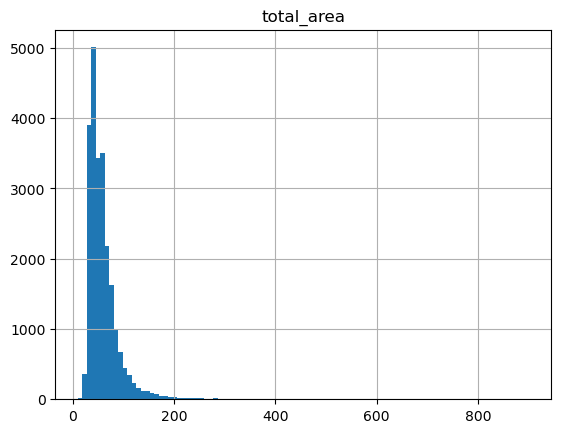

In [41]:
data['total_area'].hist(bins=100, range=(10,900))
plt.title('total_area')



На гистограмме мы видим, что основной узкий пик объявлений о продаже квартир приходится на объекты недвижимости общей площадью от 40 до 60 кв.м.; большее количество значений приходится на объекты недвижимости площадью от 50 до 100 кв.м., далее число значений стл. уменьшается. Очень мало значений наблюдаем по объектам недвижимости площадью около 200 кв.м и более.

Построим для стл."общая площадь" диаграмму размаха методом boxplot() (c указанием минимальных и максимальных значений по оси ординат - установим границы от 0 до 200 кв.м.):

<AxesSubplot:>

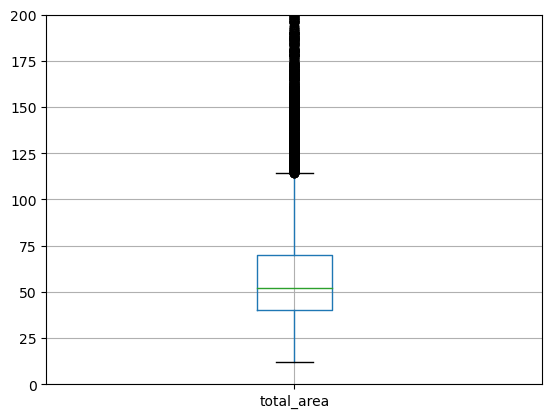

In [42]:
plt.ylim(0,200)
data.boxplot('total_area')

Из диаграммы размаха по стл."общая площадь" мы видим, что большая часть значений стл. приходится на объекты недвижимости площадью от 40 до 70 кв.м. Медианное значение - чуть более 50 кв.м.

"Верхний ус" 1,5-межквартильного размаха составляет около 110 кв.м. (это ориентировочная граница нормального размаха, за пределами которого наблюдаются выбросы).

Дополнительно к диаграмме размаха выведим числовые характеристики выборки по стл."общая площадь" методом describe():

In [43]:
data['total_area'].describe()      # числовые характеристики выборки по стл."общая площадь"

count   23650.00000
mean       60.32907
std        35.66181
min        12.00000
25%        40.00000
50%        52.00000
75%        69.70000
max       900.00000
Name: total_area, dtype: float64

Повторно выведим гистограмму по стл."жилая площадь" с максимальным значением по параметру range = 150 кв.м (значение за пределами границы нормального размаха):

Text(0.5, 1.0, 'Общая площадь')

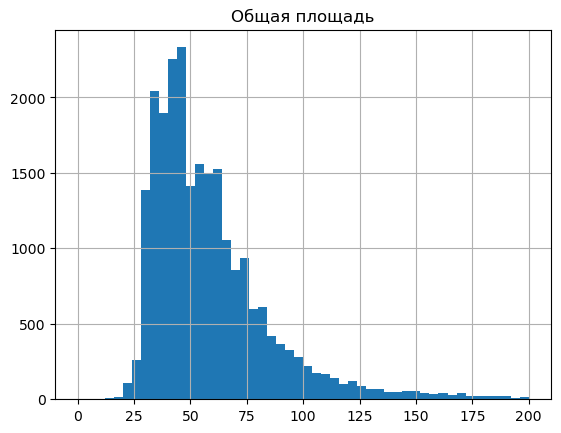

In [44]:
data['total_area'].hist(bins=50, range=(0,200))
plt.title('Общая площадь')


Согласно числовому описанию стл."общая площадь": 

*наибольшую часть датасета составляют объекты общей площадью в диапазоне от 40 кв.м до 70 кв.м;

*среднее значение общей площади наиболее представленных объектов недвижимости равно 60 кв.м., медианное значение - 52 кв.м.

На новой гистограмме более четко видно, что большое значение в датасете представлено объектами с общей площадью от 30 кв.м до 80 кв.м.

**4.1.2. Жилая площадь (кв.м.)**

Жилая площадь входит в состав общей площади. При её определении в расчёт берутся размеры только тех комнат, которые пригодны для проживания (спальня, детская, гостиная). К жилой площади не относятся кухни, коридоры, санузлы, кладовые, встроенные шкафы, балконы и лоджии.

Построим гистограмму распределения всех значений по стл. living_area с помощью метода hist().

Чтобы гистограмма была более информативна установим параметр bins=50,  параметр range ограничим значением 110 кв.м ("верхний ус" 1,5-межквартильного размаха по жилой площади).

Text(0.5, 1.0, 'Жилая площадь')

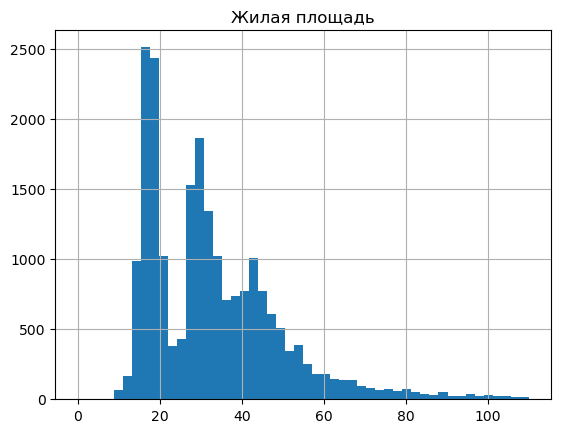

In [45]:
data['living_area'].hist(bins=50, range=(0,110))
plt.title('Жилая площадь')


<AxesSubplot:>

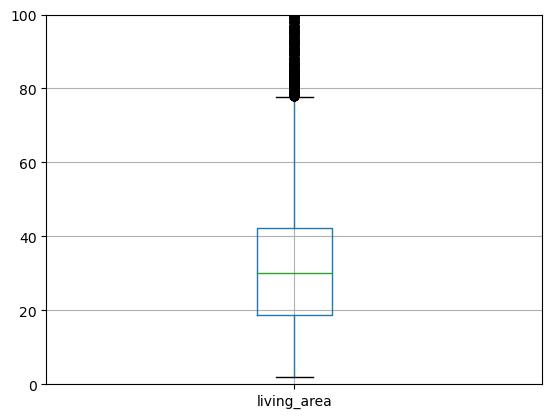

In [46]:
# диаграмма размаха для стл."жилая площадь":
plt.ylim(0,100)
data.boxplot('living_area')

На этой гистограмме по стл."жилая площадь" наблюдаем неравномерное распределение, два выраженных узких пика в значениях примерно 18 кв.м и 30 кв.м, третий менее выраженный пик приходится на 42 кв.м. Большая часть значений приходится примерно на диапазон от 17 до 50 кв.м.

**4.1.3. Площадь кухни (кв.м.)**

Площадь кухни не входит в жилую площадь, но входит в общую площадь помещения.

Построим гистограмму распределения всех значений по стл. kitchen_area с помощью метода hist().

Для гистограммы установим параметр bins=50,  параметр range ограничим значением до 70 кв.м. (верхняя граница 1,5 межквартильного размаха для площади кухни).

Text(0.5, 1.0, 'Площадь кухни')

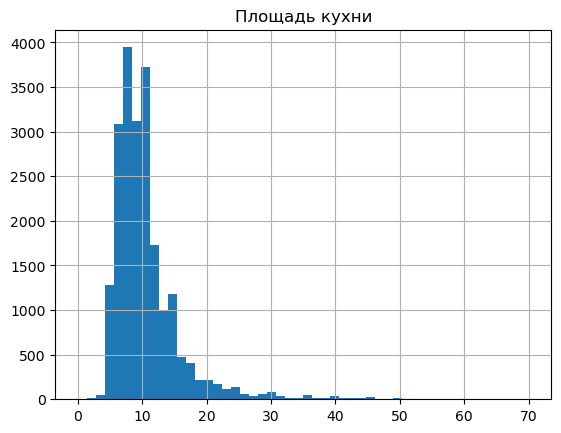

In [47]:
data['kitchen_area'].hist(bins=50,range=(0,70))
plt.title('Площадь кухни')


На гистограмме по стл."площадь кухни" видим наибольшее скопление значений в диапазоне от 6 до 12 кв.м., после отметки примерно в 15 кв.м. наблюдается уменьшение количества значений по стл.

Сопоставив гистограммы по стл."общая площадь", "жилая площадь", "площадь кухни", мы видим, например по узким высоким пикам гистограммы, что в нашей выборке по объектам недвижимости преобладают следующие типы квартир:
- с общей площадью около 30-34 кв.м. - 40-44 кв.м - 54 кв.м.
- с жилой площадью около 18 кв.м. - 30 кв.м. - 42 кв.м.
- с площадью кухни около 6 кв.м. - 9 кв.м - 10 кв.м.

Соотношение общей площади - жилой площади - площади квартиры объекта зависит от типа строительства жилья (например, "хрущевка", "9-ти этажная панелька", "сталинка", индивидуальный проект и т.п.).

**4.1.4. Количество комнат**

Этот параметр относится к жилой площади.
Посмотрим распределение значений по стл."количество комнат" на гистограмме:

In [48]:
# для начала выведим значения стл. с помощью метода value_counts():
data['rooms'].value_counts()

1     8036
2     7924
3     5797
4     1175
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
15       1
19       1
16       1
12       1
Name: rooms, dtype: int64

Text(0.5, 1.0, 'Количество комнат')

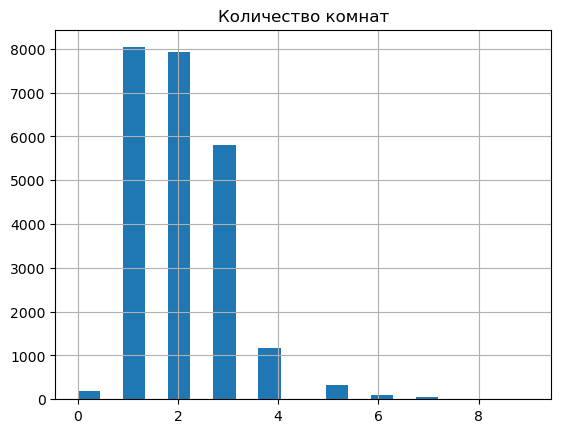

In [49]:
# теперь построим гистограмму: 
# для параметра range установим максимальное значение 9 (на большее количество комнат приходится по 1-2 объекта)

data['rooms'].hist(bins=20, range=(0,9))
plt.title('Количество комнат')


По этой гистограмме видим, что основную часть выборки объектов недвижимости составляют 1,2,3-х комнатные квартиры. 
Если сравнить эту гистограмму с гистограммой по жилой площади, то мы видим, что первые три пика на гистограмме по жилой площади 18 кв.м, 30 кв.м, 42 кв.м скорее всего приходятся соответственно на 1,2,3-ные квартиры определенного типа застройки.

Таким образом, предполагаем следующее: так как количество комнат это составляющая жилой площади объекта, на цену объекта в первую очередь будет влиять метраж общей площади, а не количество комнат.

При разных типах застройки (разное соотношение общей площади - жилой площади - площади кухни) может быть разное количество комнат при одинаковом метраже общей площади:

*например*, 3-комнатная хрущевка может быть сопоставима по площади с 2-комнатной квартирой в панельной 9-этажке, а также может быть сопоставима и по цене за 1 кв.м.
Однокомнатные квартиры при расчете цены за 1 кв.м будут дороже, чем двухкомнтаные квартиры (одного типа, находящиеся в одной локации).

На этапе предобработки данных мы выяснили, что 197 объектов с нулевым значением по стл."количество комнат" в датасете относятся к категориям "квартира-студия" или "свободная планировка".

Укрупним в датасете группы по количеству комнат с помощью функции:

In [50]:
# создадим функцию для укрупнения данных по количеству комнат
def categorize_rooms (rooms):
    if rooms == 0:
        return 'студия'
    if rooms == 1:  
        return '1 комн.'
    if rooms == 2:  
        return '2 комн.'
    if rooms == 3:  
        return '3 комн.'
    if rooms == 4:  
        return '4 комн.'
    else:
        return 'более 4 комн.'
    
# добавим новый стл.type_room в табл.    
data['type_room'] = data['rooms'].apply(categorize_rooms)

data['type_room'].value_counts() 

1 комн.          8036
2 комн.          7924
3 комн.          5797
4 комн.          1175
более 4 комн.     521
студия            197
Name: type_room, dtype: int64

Text(0.5, 1.0, 'Квартиры по количеству комнат')

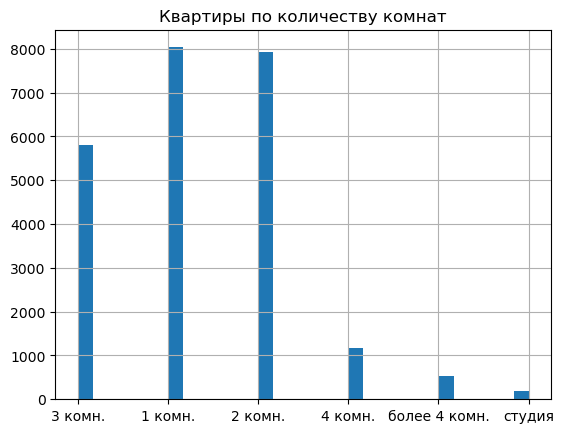

In [51]:
# построим новую гистограмму для стл.type_room:
data['type_room'].hist(bins=30)
plt.title('Квартиры по количеству комнат')


Теперь сгруппируем объекты недвижимости по количеству комнат и посмотрим средние значения общей площади - жилой площади - площади кухни по группам:

In [52]:
# Сгруппируем данные по стл.type_rooms - общее количество объектов посчитаем методом count() по стл.rooms;
# средние значения считаем методом mean() по другим стл.

data_grouped1=data.groupby('type_room').agg({'rooms':'count',
                                         'total_area':'mean', 
                                         'living_area':'mean',
                                         'kitchen_area':'mean',
                                         })

# для наглядности переименуем стл.:
data_grouped1 = data_grouped1.rename(columns={'rooms':'Кол-во объектов', 'total_area':'Сред.общая площадь', 
                                              'living_area':'Сред.жилая площадь', 'kitchen_area':'Сред. площадь кухни', 
                                              })

data_grouped1

,Кол-во объектов,Сред.общая площадь,Сред.жилая площадь,Сред. площадь кухни
type_room,,,,
1 комн.,8036,37.62746,17.89274,9.54551
2 комн.,7924,55.84228,31.73215,9.97560
3 комн.,5797,77.74802,47.37350,11.30663
4 комн.,1175,107.68179,67.04200,13.67316
более 4 комн.,521,189.85516,119.43667,19.97529
студия,197,29.27975,18.86525,NaN


Теперь мы видим средние значения по общей площади - жилой площаи - площади кухни (а также их соотношение) для 1,2,3,4 комнатных и более квартир.

Исходя из нашего предположения, что на стоимость объекта недвижимости влияет тот факт, к какому типу застройки относится объект (например, "хрущевка", "сталинка", "панелька", "индивидуальный проект" и т.п.), типизируем объекты недвижимости в нашей выборке по двум характеристикам "общая площадь" - "количество комнат".

Такая "типизация" очень примерная, правильнее было бы делать типизацию, исходя из других данных (например, типовой проект жилья, к которому относится объект, год постройки), но из-за отсутствия таких данных на примере нашей выборки типизацию сделаем по двум параметрам.

Типы выделим следующим образом (с помощью функции type_flat):

1) для каждого типа квартир с определенным количеством комнат (1-,2-,3-, 4- и более 4-комнатные, студии) определяем пределы типового размера по общей площади объекта:
   
   для этого возьмем средние значения по общей площади из табл.выше: 
   
   - пределы типового размера для 1-комнатной квартиры: от 25 кв.м до 40 кв.м;
   - пределы типового размера для 2-комнатной квартиры: от 40 кв.м до 60 кв.м;
   - пределы типового размера для 3-комнатной квартиры: от 60 кв.м до 80 кв.м;
   - пределы типового размера для 4-комнатной квартиры: от 80 кв.м до 110 кв.м;
   - пределы типового размера для квартиры с 4-мя и более комнат: от 110 кв.м до 200 кв.м;
   - пределы типового размера для квартиры-студии: от 25 кв.м до 30 кв.м
   
2) для каждого типа квартир с определенным количеством комнат (1-,2-,3-, 4- и более 4-комнтаные, студии):

   - при общей площади объекта, в пределах типового размера - устанавливаем тип "типовая";
   - при общей площади объекта, меньшей чем типовая - устанавливаем тип "mini";
   - при общей площади объекта, большей чем типовая -  устанавливаем тип "maxi".


In [53]:
# создадим стл.type_flat (тип квартиры) с помощью метода функции для одной строки:

# создадим функцию type_flat, которая будет возвращать тип квартиры при сравнении значений по стл. type_room, total_area:
# для каждого type_room зададим условия по общей площади (total_area):
# - при значениях площади ниже типовых: будет возвращаться тип объекта "mini"
# - при значениях площади в пределах типовых: будет возвращаться тип объекта "типовой"
# - при значениях площади выше типовых: будет возвращаться тип объекта "maxi"


def  type_flat(row):
    
    type_room = row['type_room']
    total_area = row['total_area'] 
    
    if type_room == '1 комн.': 
        if total_area <= 25:
            return '1 комн. mini'
        if total_area > 25 and total_area <= 40:                
            return '1 комн. типовая'
        if total_area > 40:
            return '1 комн. maxi'
           
    if type_room == '2 комн.':
        if total_area <= 40:
            return '2 комн. mini'
        if total_area > 40 and total_area <= 60:
            return '2 комн. типовая'
        if total_area > 60:
            return '2 комн. maxi'
        
    if type_room == '3 комн.':
        if total_area <= 60:
            return '3 комн. mini'
        if total_area > 60 and total_area <= 80:
            return '3 комн. типовая'
        if total_area > 80:
            return '3 комн. maxi'
    
    if type_room == '4 комн.':
        if total_area <= 80:
            return '4 комн. mini'
        if total_area > 80 and total_area <= 110:
            return '4 комн. типовая'
        if total_area > 110:
            return '4 комн. maxi'
        
    if type_room == 'более 4 комн.':
        if total_area <= 110:
            return 'более 4 комн.mini'
        if total_area > 110 and total_area <= 200:
            return 'более 4 комн.тип.'
        if total_area > 200:
            return 'более 4 комн.maxi'
    
    if type_room == 'студия':
        if total_area <= 25:
            return 'студия mini'
        if total_area > 25 and total_area <= 30:
            return 'студия типовая'
        if total_area > 30:
            return 'студия maxi'
    else:
        return 'неопредел.'

# проверка работы функции:        
# row_values = ['более 2 комн.',100]
# row_columns = ['type_room', 'total_area']
# row = pd.Series(data=row_values, index=row_columns)
# type_flat(row)

# добавляем стл. type_flat к датафрейму с помощью метода apply():
data['type_flat'] = data.apply(type_flat, axis=1)

data.head(10)
data['type_flat'].value_counts()

2 комн. типовая      5547
1 комн. типовая      5546
3 комн. типовая      2599
1 комн. maxi         2335
2 комн. maxi         2232
3 комн. maxi         1985
3 комн. mini         1213
4 комн. maxi          444
4 комн. типовая       402
4 комн. mini          329
более 4 комн.тип.     278
более 4 комн.maxi     170
1 комн. mini          155
2 комн. mini          145
студия типовая         86
студия mini            78
более 4 комн.mini      73
студия maxi            33
Name: type_flat, dtype: int64

In [54]:
# Сгруппируем данные по стл.type_rooms - общее количество объектов посчитаем методом count() по стл.rooms;
# средние значения считаем методом mean() по другим стл.

data_grouped2=data.groupby('type_flat').agg({'type_room':'count',
                                         'total_area':'mean', 
                                         'living_area':'mean',
                                         'kitchen_area':'mean',
                                         })

# для наглядности переименуем стл.:
data_grouped2 = data_grouped2.rename(columns={'type_room':'Кол-во объектов', 'total_area':'Сред.общая площадь', 
                                              'living_area':'Сред.жилая площадь', 'kitchen_area':'Сред. площадь кухни',
                                              })

data_grouped2

,Кол-во объектов,Сред.общая площадь,Сред.жилая площадь,Сред. площадь кухни
type_flat,,,,
1 комн. maxi,2335,46.26751,19.64824,12.35924
1 комн. mini,155,22.42065,15.00735,5.51939
1 комн. типовая,5546,34.41479,17.24058,8.39783
2 комн. maxi,2232,72.02296,37.22581,14.53681
2 комн. mini,145,36.89697,23.35148,7.20140
2 комн. типовая,5547,49.82674,29.74315,8.19533
3 комн. maxi,1985,101.39729,56.85213,16.46882
3 комн. mini,1213,55.78744,38.51497,6.51536
3 комн. типовая,2599,69.93516,44.34312,9.58564


Из полученной табл. видим, как отличаются объекты недвижимости с одинаковым количеством комнат по таким характеристикам, как общая площадь, жилая площадь, площадь кухни, что обусловлено разными типовыми проектами строительства.

**4.1.5. Высота потолка (м)**

Высота потолка - это характеристика объекта недвижимости, определяемая типовым проектом застройки.

Стандартом предусмотрена высота потолка от 2,5 до 2,7 м (в зависимости от климатической зоны).
На рынке недвижимости можно встретить объекты с высотой потолков от 3 до 4 м как в старом жилом фонде (например, "сталинки"), так и в новостройках.
Также на рынке недвижимости могут быть объекты и с большой высотой потолков от 5 м, например для двухуровневых квартир.

Построим гистограмму распределения нашей выборки по стл."высота потолка":

Text(0.5, 1.0, 'Высота потолка')

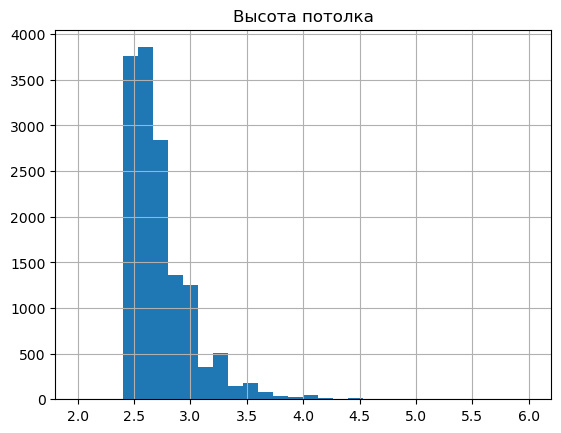

In [55]:
data['ceiling_height'].hist(bins = 30, range=(2,6))
plt.title('Высота потолка')


На гистограмме мы видим, что на рынке недвижимости больше всего представлены объекты с высотой потолков от 2,4 до 3,0 м.

Посмотрим, будет ли меняться среднее значение высоты потолка для выделенных нами типов объектов:

In [56]:
# сгруппируем датасет по стл.type_flat:
data_grouped3=data.groupby('type_flat').agg({'type_room':'count',
                                         'ceiling_height':'mean'
                                         })

# для наглядности переименуем стл.:
data_grouped3 = data_grouped3.rename(columns={'type_room':'Кол-во объектов', 'ceiling_height':'Сред.высота потолка' ,
                                              })

data_grouped3

,Кол-во объектов,Сред.высота потолка
type_flat,,
1 комн. maxi,2335,2.75988
1 комн. mini,155,2.72469
1 комн. типовая,5546,2.62646
2 комн. maxi,2232,2.86670
2 комн. mini,145,2.68740
2 комн. типовая,5547,2.63541
3 комн. maxi,1985,2.92186
3 комн. mini,1213,2.56383
3 комн. типовая,2599,2.70045


Из таблицы видим, что для всех типов объектов недвижимости средняя высота потолка выше у категории "maxi", чем у других; также наблюдаем увеличение средней высоты потолка категории "maxi" с увеличением количества комнат. Это также подтверждает то, что высота потолка определяется типом застройки.

**4.1.6. Этаж, тип этажа, общее количество этажей в доме**

Построим гистограммы для стл."этаж", "общее количество этажей", "тип этажа":

Text(0.5, 1.0, 'Этаж')

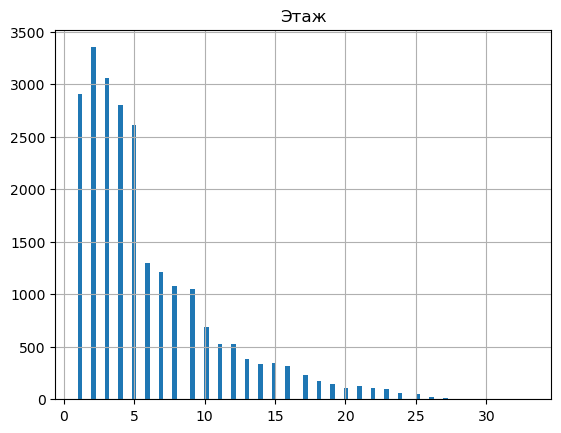

In [57]:
# гистограмма по стл.floor (этаж):
data['floor'].hist(bins=100)
plt.title('Этаж')


Text(0.5, 1.0, 'Общее количество этажей')

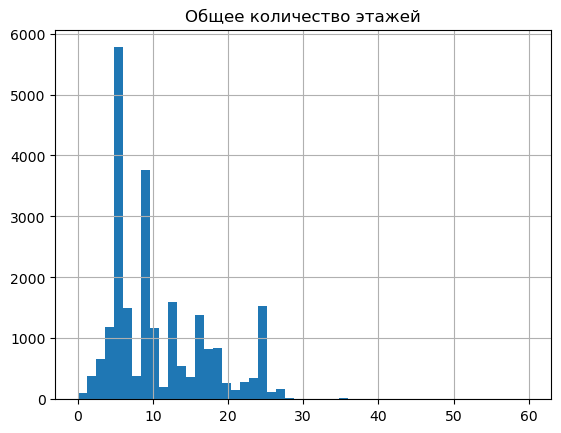

In [58]:
# гистограмма по стл.floors_total (общее количество этажей в доме):
data['floors_total'].hist(bins=50)
plt.title('Общее количество этажей')

Text(0.5, 1.0, 'Тип расположения объекта на этаже')

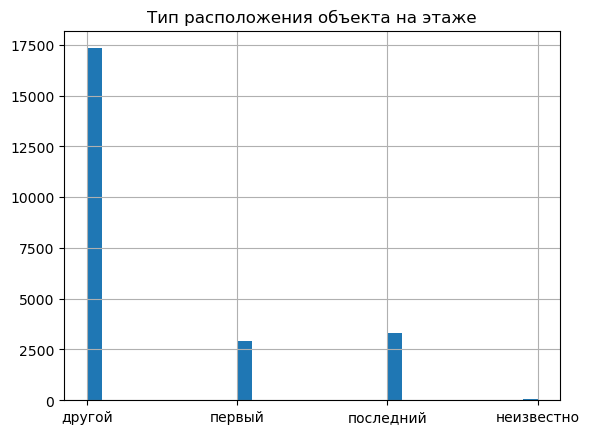

In [59]:
# гистограмма по стл.type_floor (тип этажа):
data['type_floor'].hist(bins=30)
plt.title('Тип расположения объекта на этаже')

Из представленных выше гистограмм видно, что наиболее часто на рынке недвижимости представлены квартиры, расположенные с 1 по 10 этаж, причем количество квартир, расположенных в категории "другой" по типу этажа (т.е. расположенные не на первом и не на последнем этажах) значительно больше, чем расположенных на первом или последнем этаже. 

Также в нашей выборке в порядке убывания по количеству объектов расположились квартиры, находящиеся в 5, 9, 12, 25, 16 этажных домах.

**4.2. Рассмотрим картографические параметры, характеризующие объект недвижимости:**

   - расстояние до центра города;
   
   - расстояние до ближайшего аэропорта;
   
   - расстояние до бдижайшего парка, водоема.
   
**4.2.1. Расстояние до центра города (м)**

Ранее мы предположили, что на стоимость объекта недивижмости будет оказывать влияние такой фактор как месторасположение объекта недвижимости и наличие инфраструктуры.

Из имеющихся у нас для анализа данных - расстояние до центра города, расстояние до ближайшего аэропорта, расстояние до ближайшего парка и водоема, число парков и водоемов в радиусе 3 км, можем предположить следующее:
    
  1) параметр "расстояние до центра города" будет оказывать наибольшее влияние на стоимость жилья для объектов недвижимости, расположенных в городской местности; характер связи будет отрицательный (чем меньше расстояние до центра города, тем выше стоимость объекта недвижимости).
    
  2) параметр "расстояние до ближайшего аэропорта" будет оказывать гораздо меньшее влияние на стоимость объекта недвижимости, чем первый параметр. Кроме того, данный параметр применим в отношении объектов недвижимости, расположенных либо в населенном пункте с аэропортом (в нашем исследовании - это г.Санкт-Петербург), либо в населенных пунктах, находящихся вблизи аэропорта. Характер связи будет скорее положительный (т.е. чем меньше расстояние до аэропорта, тем меньше стоимость жилья).
    
  3) совокупность таких характеристик, как "расстояние до ближайшего парка","расстояние до ближайшего водоема", "число парков в радиусе 3 км" и "число водоемов в радиусе 3 км", можно объединить в один параметр "наличие зоны отдыха". Данный параметр не оказывает существенного влияния на стоимость объекта недвижимости, чаще используется в рекламных целях, применим в отношении объектов недвижимости, расположенных рядом с парком или водоемом. 

Прежде чем построить гистограммы по картографическим данным, характеризующим объект недвижимости, еще раз посмотрим на количество и долю пропусков в этих данных. На этапе предобработки данных принято решение о том, что наличие пропусков в этих столбцах таблицы обусловлено неприменимостью той или иной характеристики к объекту, поэтому пропуски были сохранены.

In [60]:
# проверка данных на наличие дубликатов
data.duplicated().sum()

0

In [61]:
print('Количество пропусков в стл."расстояние до центра города (м)":', data['cityCenters_nearest'].isna().sum())
     
print('Количество пропусков в стл."расстояние до ближайшего аэропорта (м)":', data['airports_nearest'].isna().sum())
     
print('Количество пропусков в стл."расстояние до ближайшего парка (м)":',data['parks_nearest'].isna().sum())
     
print('Количество пропусков в стл."расстояние до ближайшего водоема (м)":',data['ponds_nearest'].isna().sum())
     

Количество пропусков в стл."расстояние до центра города (м)": 5511
Количество пропусков в стл."расстояние до ближайшего аэропорта (м)": 5534
Количество пропусков в стл."расстояние до ближайшего парка (м)": 15586
Количество пропусков в стл."расстояние до ближайшего водоема (м)": 14565


Таким образом, в нашей выборке у 78% объектов недвижимости имеются характеристики о расстоянии до центра города и до ближайшего аэропорта; примерно у 40% объектов недвижимости указаны характеристики о расстоянии до ближайшего парка или водоема.

Сформируем с помощью метода pivot_table выборку по объектам недвижимости, в объявлениях о продаже которых было указано расстояние до центра города:

In [62]:
# по стл.type_locality,locality_name группируем данные для таблицы 
# по значениям стл.cityCenters_nearest считаем общее количество объектов недвижимости с указанным параметром методом count() 
# сохраняем нашу выборку в переменную data_cityCentr
                             
data_temp = data.query('cityCenters_nearest > 0')
data_cityCentr = data_temp.pivot_table(index=['type_locality','locality_name'], 
                                            values='cityCenters_nearest', aggfunc='count')
data_cityCentr.columns = ['Кол-во объектов с расстоянием до центра города']
data_cityCentr

Кол-во объектов с расстоянием до центра города
type_locality locality_name                                                          
город         Зеленогорск                                                          24
              Колпино                                                             337
              Красное Село                                                        176
              Кронштадт                                                            95
              Ломоносов                                                           132
              Павловск                                                             38
              Петергоф                                                            201
              Пушкин                                                              368
              Санкт-Петербург                                                   15660
              Сестрорецк                                                          183
поселок       поселок Александровская                                               2
              поселок Белоостров                                                    1
              поселок Левашово                                                      1
              поселок Лисий Нос                                                     3
              поселок Металлострой                                                 66
              поселок Молодежное                                                    5
              поселок Мурино                                                        2
              поселок Парголово                                                   327
              поселок Песочный                                                      4
              поселок Петро-Славянка                                                1
              поселок Понтонный                                                    20
              поселок Репино                                                        4
              поселок Саперный                                                      6
              поселок Стрельна                                                     44
              поселок Усть-Ижора                                                    2
              поселок Шушары                                                      436
              поселок Щеглово                                                       1

Из таблицы видим, что такая характеристика как "расстояние до центра города" указана в объявлениях о продаже объектов недвижимости Санкт-Петербурга и др.городов Ленинградской области, а также в части объявлений о продаже объектов недвижимости, находящихся в поселках, расположенных скорее всего близко к крупным городам.

Теперь посторим гистограмму и диаграмму размаха для стл."расстояние до центра города(м)":

Text(0.5, 1.0, 'Расстояние до центра города')

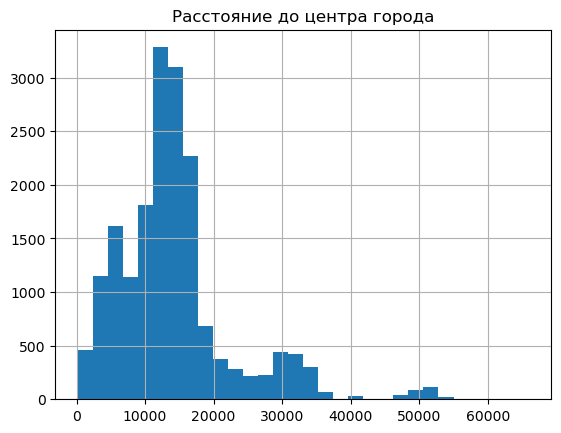

In [63]:
# гистограмма распределения значений по стл."расстояние до центра города (м)":
data['cityCenters_nearest'].hist(bins=30)
plt.title('Расстояние до центра города')


<AxesSubplot:>

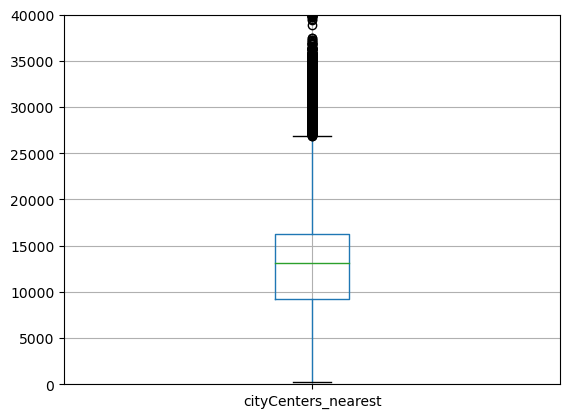

In [64]:
# диаграмма размаха по стл."расстояние до центра города (м)":
plt.ylim(0,40000)
data.boxplot('cityCenters_nearest')

Из гистограммы распределения значений по стл."расстояние до центра города (м)" видим:

- наибольшая часть значений приходится на диапазон примерно от 10 км до 16 км,
- меньшая часть значений находится в диапазоне до 10 км,
- очень малая часть значений приходится на диапазон более 20 км.

По диаграмме размаха по этому стл. видим выбросы за пределами отметки в 26 км.

**4.2.3. Расстояние до ближайшего аэропорта (м)**

Аналогично анализу предыдущего параметра, сформируем с помощью метода pivot_table выборку по объектам недвижимости, в объявлениях о продаже которых было указано расстояние до ближайшего аэропорта:

In [65]:
# по стл.type_locality,locality_name группируем данные для таблицы 
# по значениям стл.airports_nearest считаем общее количество объектов недвижимости с указанным параметром методом count() 
# сохраняем нашу выборку в переменную data_locality_air

data_temp = data.query('airports_nearest > 0')
data_locality_air = data_temp.pivot_table(index=['type_locality','locality_name'], 
                                          values='airports_nearest', aggfunc='count')
data_locality_air.columns = ['Кол-во объектов с расстоянием до аэропорта']
data_locality_air

Кол-во объектов с расстоянием до аэропорта
type_locality locality_name                                                      
город         Зеленогорск                                                      24
              Колпино                                                         337
              Красное Село                                                    176
              Кронштадт                                                        95
              Ломоносов                                                       132
              Павловск                                                         38
              Петергоф                                                        201
              Пушкин                                                          369
              Санкт-Петербург                                               15635
              Сестрорецк                                                      183
поселок       поселок Александровская                                           2
              поселок Белоостров                                                1
              поселок Левашово                                                  1
              поселок Лисий Нос                                                 3
              поселок Металлострой                                             66
              поселок Молодежное                                                5
              поселок Мурино                                                    2
              поселок Парголово                                               327
              поселок Песочный                                                  4
              поселок Петро-Славянка                                            1
              поселок Понтонный                                                20
              поселок Репино                                                    4
              поселок Саперный                                                  6
              поселок Стрельна                                                 44
              поселок Усть-Ижора                                                2
              поселок Шушары                                                  436
              поселок Щеглово                                                   1

Из таблицы видим, что наибольшее количество объявлений о продаже объектов недвижимости, содержащих характеристику "расстояние до ближайшего аэропорта" указано у объектов, расположенных в Санкт-Петербурге (67% от общего количества объявлений), а также, например, в пос.Шушары, г. Пушкин (последние находятся от аэропорта Пулково на расстоянии до 20 км).

Также мы видим, что выборка объектов недвижимости с наличием характеристики о расстоянии до центра города идентична выборке объектов с наличием характеристики о расстоянии до ближайшего аэропорта (по крайней мере, по количеству отобранных объектов). 

Теперь посторим гистограмму и диаграмму размаха для стл."расстояние до ближайшего аэропорта(м)":

Text(0.5, 1.0, 'Расстояние до ближайшего аэропорта')

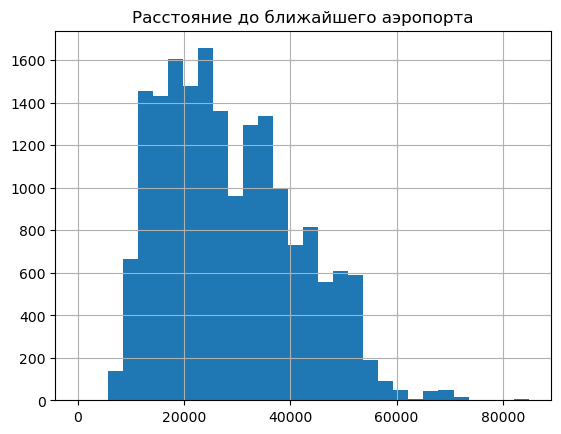

In [66]:
# гистограмма распределения значений по стл."расстояние до ближайшего аэропорта (м)":
data['airports_nearest'].hist(bins=30)
plt.title('Расстояние до ближайшего аэропорта')

<AxesSubplot:>

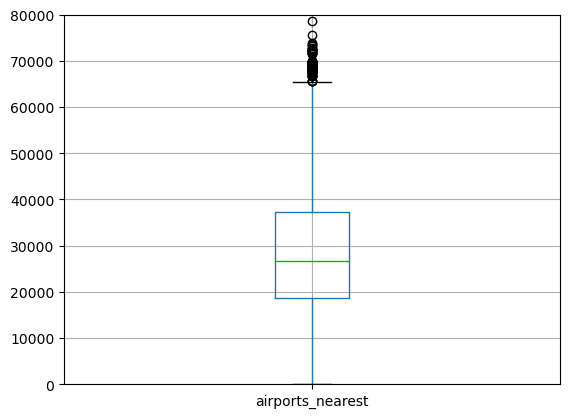

In [67]:
# диаграмма размаха для стл."расстояние до ближайшего аэропорта (м)"
plt.ylim(0,80000)
data.boxplot('airports_nearest')

Из графиков видим, что большее количество объектов недвижимости в нашей выборке расположены на расстоянии примерно от 15 км до 40 км до ближайшего аэропорта. За отметкой расстояния равного 65 км наблюдаются выбросы.

**4.2.4. Расстояние до ближайшего парка (м), водоема (м)**


Проведем по этому параметру такой же анализ как в отношении двух предыдущих параметров - расстояние до центра города и до ближайшего аэропорта.

Сформируем с помощью метода pivot_table выборку по объектам недвижимости, в объявлениях о продаже которых были указаны такие характеристики, как расстояние до ближайшего парка или водоема, а также количество парков или водоемов в радиусе до 3 км. Полученную выборку сгруппируем по локации.

В итоге мы получим выборку с объектами недвижимости, расположенных в местах рядом с локациями для отдыха.

In [68]:
# по стл.type_locality,locality_name группируем данные для таблицы 
# в итоговую табл. включаем стл.с количеством объектов недвижимости, расположенных рядом с местами отдыха - водоем, парк
# по значениям стл.ponds_nearest считаем общее количество объектов недвижимости с указанным параметром методом count()
# по значениям стл.parks_nearest считаем общее количество объектов недвижимости с указанным параметром методом count()
# сохраняем нашу выборку в переменную data_relaction

data_temp = (data[(data['parks_nearest'] > 0) & (data['parks_around3000'] > 0) | 
     (data['ponds_nearest'] > 0) & (data['ponds_around3000'] > 0)])

# data_relaction.head()

data_relaction = data_temp.pivot_table(index=['type_locality','locality_name'], 
                                         values=['ponds_nearest','parks_nearest'], aggfunc='count')
data_relaction.columns = ['Кол-во объектов рядом с водоемами', 'Кол-во объектов рядом с парками']
data_relaction

Кол-во объектов рядом с водоемами  \
type_locality locality_name                                                
город         Зеленогорск                                             16   
              Колпино                                                133   
              Красное Село                                            46   
              Кронштадт                                               87   
              Ломоносов                                               16   
              Павловск                                                26   
              Петергоф                                               143   
              Пушкин                                                 212   
              Санкт-Петербург                                       7284   
              Сестрорецк                                              72   
поселок       поселок Александровская                                  0   
              поселок Белоостров                                       0   
              поселок Мурино                                           0   
              поселок Парголово                                       10   
              поселок Петро-Славянка                                   0   
              поселок Понтонный                                        0   
              поселок Саперный                                         0   
              поселок Стрельна                                        19   
              поселок Шушары                                           0   

                                       Кол-во объектов рядом с парками  
type_locality locality_name                                             
город         Зеленогорск                                           18  
              Колпино                                              190  
              Красное Село                                          10  
              Кронштадт                                             87  
              Ломоносов                                             83  
              Павловск                                              34  
              Петергоф                                             117  
              Пушкин                                               177  
              Санкт-Петербург                                     7983  
              Сестрорецк                                           135  
поселок       поселок Александровская                                2  
              поселок Белоостров                                     1  
              поселок Мурино                                         2  
              поселок Парголово                                     56  
              поселок Петро-Славянка                                 1  
              поселок Понтонный                                      7  
              поселок Саперный                                       6  
              поселок Стрельна                                      24  
              поселок Шушары                                       152

Из таблицы видим, выборка объектов недвижимости, расположенных в местах рядом с локациями для отдыха, наиболее всего представлена объектами г.Санкт-Петербурга (доля таких объектов от общего количества составляет 34%).

Посмотрим на гистограммы по распределению значений стл."расстояние до ближайшего парка" и стл."расстояние до ближайшего водоема":

Text(0.5, 1.0, 'Расстояние до ближайшего парка')

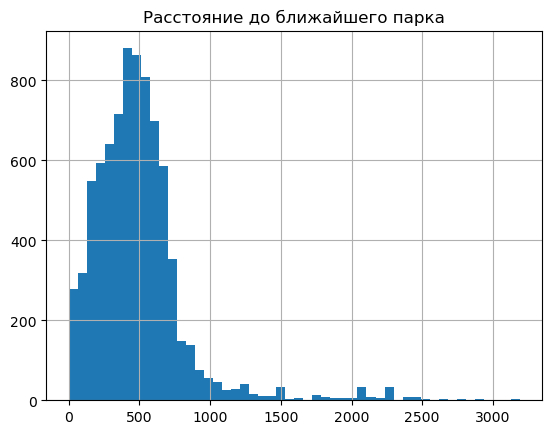

In [69]:
# гистограмма распределения значений по стл."расстояние до ближайшего парка (м)":
data['parks_nearest'].hist(bins=50)
plt.title('Расстояние до ближайшего парка')

Text(0.5, 1.0, 'Расстояние до ближайшего водоема')

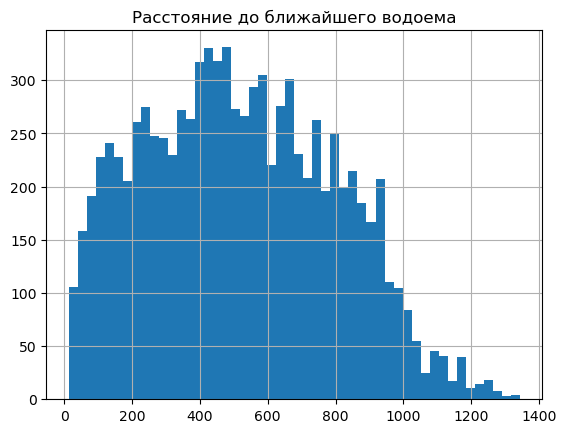

In [70]:
# гистограмма распределения значений по стл."расстояние до ближайшего водоема (м)":
data['ponds_nearest'].hist(bins=50)
plt.title('Расстояние до ближайшего водоема')

На гистограммах видим, что в нашей выборке в основном представлены объекты недвижимости с локациями для отдыха (парк или водоем), находящиеся на расстоянии от 200 м до 800 м от места отдыха, т.е. в шаговой доступности.

**4.3. День и месяц публикации**

Один из параметров, не относящийся ни к основным и ни к картографическим характеристикам объекта недвижимости, рассмотренный в этом разделе - это день и месяц публикации объявления о продаже объекта недвижимости.


Text(0.5, 1.0, 'День недели размещения публикации')

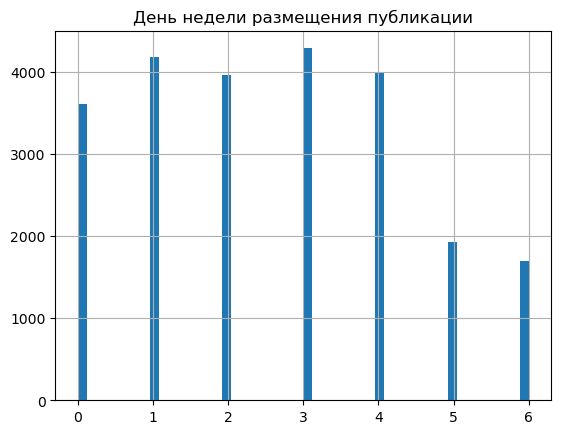

In [71]:
# построим гистограмму для стл."день публикации":
data['weekday'].hist(bins=50, range=(0,6))
plt.title('День недели размещения публикации')


Согласно гистограмме по стл."день публикации" наибольшее количество публикаций о продаже объектов недвижимости размещается пользователями в будние дни (с понедельника по пятницу), в выходные дни таких публикаций меньше.

Text(0.5, 1.0, 'Месяц размещения публикации')

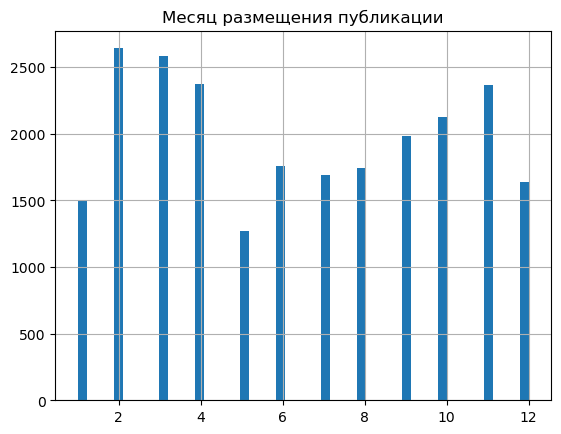

In [72]:
# построим гистограмму для стл."месяц публикации":
data['month_exp'].hist(bins=50, range=(1,12))
plt.title('Месяц размещения публикации')

Согласно гистограмме по стл."месяц публикации":
   - наибольшее количество публикаций о продаже объектов недвижимости приходится на период с февраля по апрель, 
   - далее отмечается рост количества публикаций на период с сентября по ноябрь,
   - меньшее количество публикаций приходится на "летний период" (т.н. отпускной период) - с июня по август,
   - ещё меньшее количество публикаций приходится на такие месяцы, как декабрь (скорее всего связано со срочностью завершения  рабочего года), январь и май (месяцы с самыми продолжительными выходными днями).

Text(0.5, 1.0, 'Распределение по годам размещения публикаций')

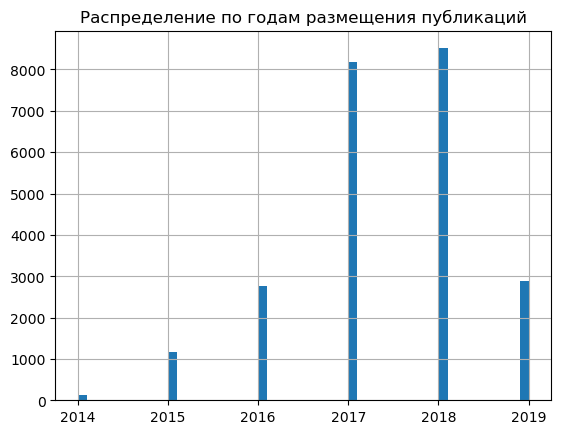

In [73]:
# построим гистограмму для стл."год публикации":
data['year_exp'].hist(bins=50)
plt.title('Распределение по годам размещения публикаций')


Наибольшее количество публикаций о продаже объектов недвижимости было размещено в 2017, 2018 годах.

Text(0.5, 1.0, 'Общее количество дней размещения публикации')

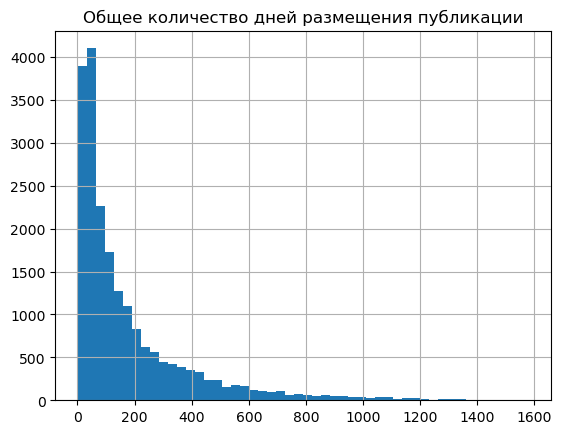

In [74]:
# построим гистограмму для стл."количество дней размещения публикации":
data['days_exposition'].hist(bins=50)
plt.title('Общее количество дней размещения публикации')

In [75]:
data['days_exposition'].describe()

count   20470.00000
mean      180.75320
std       219.77792
min         1.00000
25%        45.00000
50%        95.00000
75%       231.00000
max      1580.00000
Name: days_exposition, dtype: float64

<AxesSubplot:>

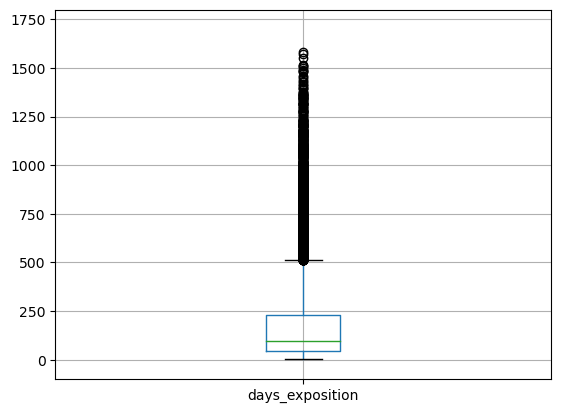

In [76]:
# построим диаграмму размаха для стл."количество дней размещения публикации":
plt.ylim(-100,1800)
data.boxplot('days_exposition')

Из гистограммы видим, что наибольшее количество объявлений о продаже объектов недвижимости было размещено на ресурсе сроком до 100 дней (3-4 мес.), средний срок размещения объявления - 180 дней (6 мес.).

Медианное значение по этому стл. означает, что половина объявлений о продаже объектов недвижимости размещались сроком до 95 дней (3 мес.). Этот срок можно условно принять за срок, характеризующий быстрые продажи. Отметку около 500 дней (1 год 4 мес.) ("верхний ус" нормального распределения по этому стл.) можно принять для характеристики долгих продаж.

Вообще, точно определить срок продажи объекта по данному показателю затруднительно, так как нам неизвестно с чем связано снятие объявления с публикации: либо  с тем, что объект продан, либо просто с решением пользователя закрыть публикацию.

**4.4. Цена объекта**

Последний к рассмотрению на этом этапе параметр - это цена объекта недвижимости.

Построим гистограмму распределения всех значений по стл. last_price с помощью метода hist().

Первоначально, на этапе предобработке данных мы выводили гистограмму для этого стл., на которой все значения "собрались" в один столбец (по причине очень большого размаха в данных. 
Минимальное и максимальное значения для этого стл., полученные методом min() и max(), составляют: 
min = 12190 руб., 
max = 763 млн.руб.

Поэтому для начала с помощью метода query() получим срез по стл."последняя цена" с наибольшими значениями:

In [77]:
# делаем срез по стл.last_price через внешнюю переменную - цена >= 100 млн.руб.
# и сохраняем его в переменную data_filtred1:

variable = 100000000
data_filtred = data.query('last_price >= @variable')

# полученный срез отсортируем по стл.total_area по убыванию, чтобы посмотреть 
# как меняется цена в этом срезе от общей площади объекта:

data_filtred.sort_values('total_area', ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,type_locality,price_metr,weekday,month_exp,year_exp,type_floor,cityCentr_km,type_room,type_flat
19540,8,420000000.00000,900.00000,2017-12-06,12,2.80000,25,409.70000,25,NaN,...,106,город,466666.66667,2,12,2017,последний,8.00000,более 4 комн.,более 4 комн.maxi
12859,20,140000000.00000,631.20000,2019-04-09,7,3.90000,4,322.30000,4,NaN,...,<NA>,город,221799.74651,1,4,2019,последний,5.00000,более 4 комн.,более 4 комн.maxi
3117,19,140000000.00000,631.00000,2019-03-30,7,NaN,5,NaN,5,NaN,...,<NA>,город,221870.04754,5,3,2019,последний,5.00000,более 4 комн.,более 4 комн.maxi
15651,20,300000000.00000,618.00000,2017-12-18,7,3.40000,7,258.00000,5,NaN,...,111,город,485436.89320,0,12,2017,другой,5.00000,более 4 комн.,более 4 комн.maxi
15016,8,150000000.00000,500.00000,2016-01-13,4,3.20000,7,NaN,7,NaN,...,303,город,300000.00000,2,1,2016,последний,6.00000,4 комн.,4 комн. maxi
5893,3,230000000.00000,500.00000,2017-05-31,6,NaN,7,NaN,7,NaN,...,50,город,460000.00000,2,5,2017,последний,5.00000,более 4 комн.,более 4 комн.maxi
21955,19,130000000.00000,431.00000,2017-10-02,7,3.70000,8,220.00000,5,NaN,...,161,город,301624.12993,0,10,2017,другой,NaN,более 4 комн.,более 4 комн.maxi
13749,7,240000000.00000,410.00000,2017-04-01,6,3.40000,7,218.00000,7,NaN,...,199,город,585365.85366,5,4,2017,последний,5.00000,более 4 комн.,более 4 комн.maxi
14706,15,401300000.00000,401.00000,2016-02-20,5,NaN,9,204.00000,9,False,...,393,город,1000748.12968,5,2,2016,последний,2.00000,более 4 комн.,более 4 комн.maxi
12971,19,763000000.00000,400.00000,2017-09-30,7,NaN,10,250.00000,10,NaN,...,33,город,1907500.00000,5,9,2017,последний,4.00000,более 4 комн.,более 4 комн.maxi


Из табл. выше видим, что 37 объектов недвижимости указаны с ценой от 100 млн.руб. - при этом наблюдается разброс в общей площади у данных объектов: от 124.5 кв.м. до 900 кв.м.

Объект с максимальной ценой (стр.12971) имеет площадь 400 кв.м., а у самого большого по площади объекта 900 кв.м.(стр.19540) - цена ниже и равна 420 млн.руб. Большой разброс видим также и в стл."цена за метр".

Посмотрим отдельно эти два объекта:

In [78]:
# объект с максимальной стоимостью:
data.loc[12971]

total_images                             19
last_price                  763000000.00000
total_area                        400.00000
first_day_exposition    2017-09-30 00:00:00
rooms                                     7
ceiling_height                          NaN
floors_total                             10
living_area                       250.00000
floor                                    10
is_apartment                            NaN
studio                                False
open_plan                             False
kitchen_area                            NaN
balcony                                   2
locality_name               Санкт-Петербург
airports_nearest                25108.00000
cityCenters_nearest              3956.00000
parks_around3000                          1
parks_nearest                     530.00000
ponds_around3000                          3
ponds_nearest                     756.00000
days_exposition                          33
type_locality                   

Объект недвижимости общей площадью 400 кв.м. и стоимостью 763 млн.руб. находится в г.Санкт-Петербург в 4 км от центра города, стоимость 1 кв.м.- 1,9 млн.руб. Объект расположен на последнем 10 этаже, имеются 2 балкона. Почти половину от общей площади объекта составляет т.н. "полезная площадь" (не относящаяся к жилой площади, обычно включает в себя помещения кухни, гардеробные, коридоры, балконы и т.п.). Объект расположен в шаговой доступности до ближайшего водоема и парка. Можно предположить, что этот объект недвижимости расположен в исторической части города.

In [79]:
# объект с максимальной общей площадью:
data.loc[19540]

total_images                              8
last_price                  420000000.00000
total_area                        900.00000
first_day_exposition    2017-12-06 00:00:00
rooms                                    12
ceiling_height                      2.80000
floors_total                             25
living_area                       409.70000
floor                                    25
is_apartment                            NaN
studio                                False
open_plan                             False
kitchen_area                      112.00000
balcony                                   0
locality_name               Санкт-Петербург
airports_nearest                30706.00000
cityCenters_nearest              7877.00000
parks_around3000                          0
parks_nearest                           NaN
ponds_around3000                          2
ponds_nearest                     318.00000
days_exposition                         106
type_locality                   

Данный объект недвижимости с максимальной площадью 900 кв.м. (в 2 раза больше, чем предыдущий объект), но со стоимостью 420 млн.руб. (почти в 2 раза меньше, чем предыдущий объект) также находится в Санкт-Петербурге, но уже на большем расстоянии от центра города (также почти в 2 раза). Стоимость 1 кв.м. у этого объекта - 470 тыс.руб.(почти в 4 раза меньше, чем у предыдущего). Данный объект также расположен на последнем, но уже 25 этаже, балконы отсутствуют, в шаговой доступности имеется водоем. Здесь можно предположить, что этот объект недвижимости относится к категории "нового элитного жилья".

Теперь посмотрим наименьшие значения по стл.last_price:

In [80]:
# делаем срез по стл.last_price через внешнюю переменную - цена <= 500 тыс.руб.
# и сохраняем его в переменную data_filtred2:

variable = 500000
data_filtred2 = data.query('last_price <= @variable')

# полученный срез отсортируем по стл.total_area по убыванию, чтобы посмотреть 
# как меняется цена в этом срезе от общей площади объекта:

data_filtred2.sort_values('total_area', ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,type_locality,price_metr,weekday,month_exp,year_exp,type_floor,cityCentr_km,type_room,type_flat
8793,7,12190.00000,109.00000,2019-03-20,2,2.75000,25,32.00000,25,NaN,...,8,город,111.83486,2,3,2019,последний,9.00000,2 комн.,2 комн. maxi
14911,5,430000.00000,54.00000,2018-06-26,2,NaN,3,NaN,3,NaN,...,44,поселок,7962.96296,1,6,2018,последний,NaN,2 комн.,2 комн. типовая
4405,9,500000.00000,52.00000,2018-08-02,2,2.70000,2,31.00000,1,NaN,...,110,город,9615.38462,3,8,2018,первый,NaN,2 комн.,2 комн. типовая
23484,11,470000.00000,44.50000,2018-07-02,2,NaN,2,28.00000,2,NaN,...,298,город,10561.79775,0,7,2018,последний,NaN,2 комн.,2 комн. типовая
9581,7,450000.00000,43.40000,2018-08-31,2,NaN,5,30.30000,3,NaN,...,96,деревня/село,10368.66359,4,8,2018,другой,NaN,2 комн.,2 комн. типовая
5698,7,450000.00000,42.00000,2017-07-31,2,NaN,1,23.00000,1,NaN,...,233,поселок,10714.28571,0,7,2017,первый,NaN,2 комн.,2 комн. типовая
18867,1,470000.00000,41.00000,2018-02-11,1,NaN,5,32.00000,3,NaN,...,46,деревня/село,11463.41463,6,2,2018,другой,NaN,1 комн.,1 комн. maxi
6859,6,490000.00000,40.00000,2017-12-11,1,NaN,5,NaN,3,NaN,...,43,деревня/село,12250.00000,0,12,2017,другой,NaN,1 комн.,1 комн. типовая
16274,18,440000.00000,40.00000,2018-07-10,1,NaN,5,NaN,1,NaN,...,45,деревня/село,11000.00000,1,7,2018,первый,NaN,1 комн.,1 комн. типовая
16219,14,450000.00000,38.50000,2018-07-11,2,2.65000,2,NaN,1,NaN,...,45,деревня/село,11688.31169,2,7,2018,первый,NaN,2 комн.,2 комн. mini


В данном срезе мы видим 18 объектов недвижимости стоимостью до 500 тыс.руб., объект с минимальной стоимостью - это ошибка в данных. Цена за 1 кв.м. в этом срезе - менее 20 тыс.руб. Данные эти ошибочные.
В этом срезе мы также видим разброс по стоимости-площади объекта. 


Теперь посмотрим числовые характеристики по стл.last_price c помощью метода describe():

In [81]:
pd.options.display.float_format = '{:.2f}'.format
data['last_price'].describe()

count       23650.00
mean      6541126.90
std      10896399.18
min         12190.00
25%       3400000.00
50%       4650000.00
75%       6799000.00
max     763000000.00
Name: last_price, dtype: float64

В датасете по объектам недвижимости средняя цена составляет 6,5 млн руб., а медианное значение - 4,7 млн. руб. Верхняя граница межквартильного размаха составляет 7 млн.руб.

Для построения диаграммы размаха по стл."последняя цена": по оси ординат установим максимальное значениe - 15 000 000 (это значение больше "верхнего уса" 1,5 - межквартильного размаха по этому стл.):

<AxesSubplot:>

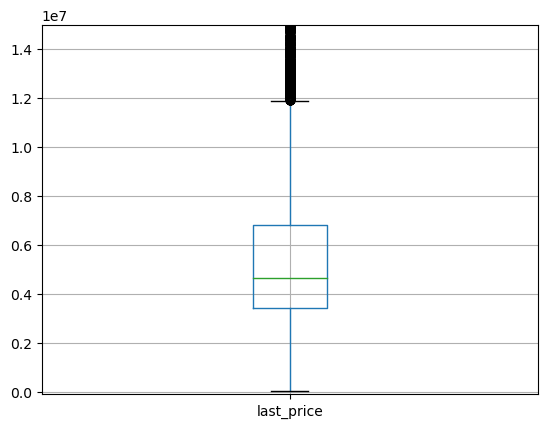

In [82]:
# диаграмма размаха для стл.last_price:
plt.ylim(-100000,15000000)
data.boxplot('last_price')

Из диаграммы размаха по стл."последняя цена" видим, что межквартильный размах находится примерно в диапазоне от 3 млн.руб. до 7 млн.руб., а "верхний ус" нормального размаха значений по стл. - чуть более 12 млн.руб.

Построим теперь гистограмму для стл."последняя цена" с установленным максимальным значением параметра range = 12 млн.руб. (за переделами которого наблюдаются выбросы значений):

Text(0.5, 1.0, 'Цена объекта')

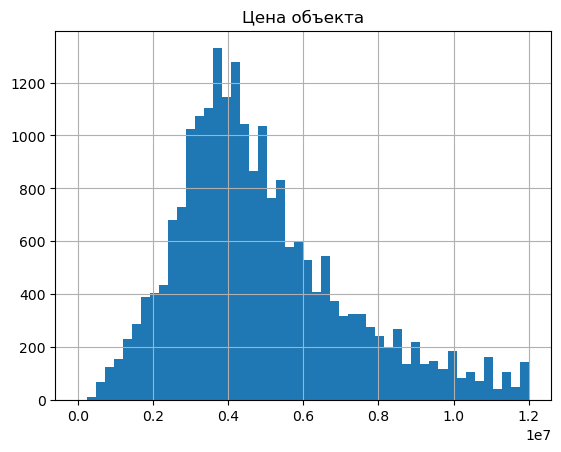

In [83]:
data['last_price'].hist(bins=50, range=(0, 12000000))
plt.title('Цена объекта')

Теперь гистограмма для стл.last_price из одного столбца превратилась в "лесенку".

Исходя из нашей гипотезы, что цена объекта в первую очередь определяется размером общей площади, построим гистограмму и диаграмму размаха для стл."цена за 1 кв.м".

In [84]:
# числовое описание стл."цена за 1 кв.м":

data['price_metr'].describe()

count     23650.00
mean      99432.25
std       50337.94
min         111.83
25%       76614.97
50%       95000.00
75%      114274.16
max     1907500.00
Name: price_metr, dtype: float64

Средняя цена за 1 кв.м.= 99,5 тыс.руб.

Медианное значение по стл."цена за 1 кв.м." близкое к средней цене и составляет 95,0 тыс.руб.

<AxesSubplot:>

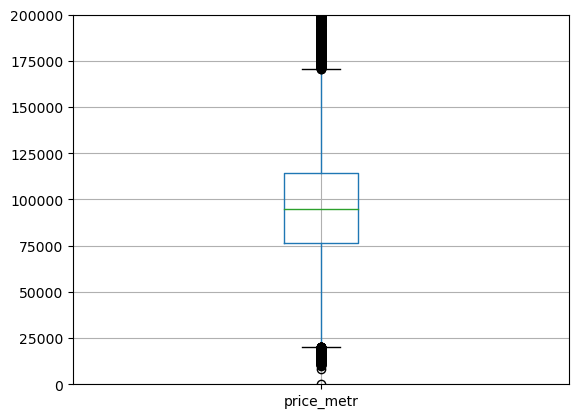

In [85]:
# диаграмма размаха для стл."цена за 1 кв.м"

plt.ylim(0,200000)
data.boxplot('price_metr')

Text(0.5, 1.0, 'Цена за 1 кв.метр')

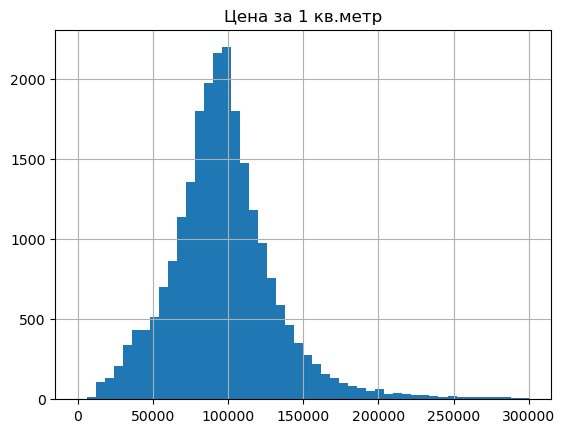

In [86]:
# гистограмма для стл."цена за 1 кв.м"

data['price_metr'].hist(bins=50, range=(0,300000))
plt.title('Цена за 1 кв.метр')

На полученной гистограмме по стл."цена за 1 кв.м" видим нормальное распределение значений стл., основной пик значений приходится на отметку в 100 тыс.руб., наибольшее количество значений по стл.распологается в диапазоне от 70 тыс.руб. до 130 тыс.руб. 

На диаграмме размаха мы видим, что нижняя граница межквартильного размаха по стл."цена за 1 кв.м" составляет около 75 тыс.руб., а верхняя граница - 120 тыс.руб.; выбросы наблюдаются за пределами отметки ниже 20 тыс.руб. и выше 175 тыс.руб.

Для дальнейшего изучения и корректного определения факторов, наиболее влияющих на стоимость объекта недвижимости, необходимо очистить наш датасет от выбросов и аномалий.

Так как цена за 1 кв.м. - это типичная метрика для оценки рынка недвижимости, а также является статистической величиной, очищение выборки будем осуществлять по этому параметру.

**4.5. Определение факторов, оказывающих наибольшее влияние на стоимость объекта**

**4.5.1. Обработка датасета на предмет исключения выбросов**

  ***1. Выведим срез по выборке объектов недвижимости с низкими значениями по стл."цена за 1 кв.м."***: в соответствии с полученной диаграммой размаха по стл. установим минимальное значение, за пределами которого наблюдаются выбросы, равное 20 тыс.руб. за 1 кв.м

In [87]:
# делаем срез по стл.price_metr методом query() c условием: цена за 1 кв.м <= 20 тыс.руб.
# и сохраняем его в переменную data_filtr1:

data_filtr1 = data.query('price_metr <= 20000')

# полученный срез отсортируем по стл.total_area по убыванию, чтобы посмотреть 
# объекты какой площади попали в срез:
data_filtr1.sort_values('total_area', ascending=False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,type_locality,price_metr,weekday,month_exp,year_exp,type_floor,cityCentr_km,type_room,type_flat
21338,15,3200000.00,190.00,2016-06-16,1,3.00,6,43.00,4,False,...,11,город,16842.11,3,6,2016,другой,4.00,1 комн.,1 комн. maxi
19952,7,2200000.00,138.70,2016-06-24,4,NaN,7,90.70,5,False,...,203,город,15861.57,4,6,2016,другой,4.00,4 комн.,4 комн. maxi
23477,3,1450000.00,138.00,2018-07-06,3,NaN,2,58.00,2,NaN,...,52,город,10507.25,4,7,2018,последний,NaN,3 комн.,3 комн. maxi
17753,12,1800000.00,117.30,2016-02-18,5,NaN,4,23.60,2,False,...,139,город,15345.27,3,2,2016,другой,5.00,более 4 комн.,более 4 комн.тип.
4659,1,1650000.00,115.00,2019-02-28,5,NaN,5,71.00,1,NaN,...,<NA>,город,14347.83,3,2,2019,первый,NaN,более 4 комн.,более 4 комн.тип.
8793,7,12190.00,109.00,2019-03-20,2,2.75,25,32.00,25,NaN,...,8,город,111.83,2,3,2019,последний,9.00,2 комн.,2 комн. maxi
23394,10,1600000.00,92.00,2018-07-10,3,3.00,6,13.00,1,NaN,...,3,город,17391.30,1,7,2018,первый,4.00,3 комн.,3 комн. maxi
19490,8,1200000.00,89.00,2017-07-08,4,3.00,2,60.30,2,NaN,...,242,город,13483.15,5,7,2017,последний,NaN,4 комн.,4 комн. типовая
16444,15,990000.00,88.00,2019-04-08,3,NaN,1,40.00,1,NaN,...,<NA>,поселок,11250.00,0,4,2019,первый,NaN,3 комн.,3 комн. maxi
9471,4,850000.00,78.00,2017-05-04,3,NaN,9,12.50,7,NaN,...,169,город,10897.44,3,5,2017,другой,NaN,3 комн.,3 комн. типовая


In [88]:
# посмотрим количество объектов недвижимости в срезе data_filtr1

data_filtr1['price_metr'].count()

171

В срезе указан 171 объект недвижимости с ценой за 1 кв.м <= 20 тыс.руб. - это нижняя отметка нормального разброса по стл."цена за 1 кв.м."

При этом видим, что в срезе данных имеются объекты недвижимости с большой общей площадью (более 100 кв.м).

Доля объектов данного среза составляет 0,7% от общего числа объектов недвижимости.

***2. Выведим срез по выборке объектов недвижимости с высокими значениями по стл."цена за 1 кв.м."***: в соответствии с полученной диаграммой размаха по стл. установим максимальное значение, за пределами которого наблюдаются выбросы, равное 175 тыс.руб. за 1 кв.м

In [89]:
# делаем срез по стл.price_metr методом query() c условием: цена за 1 кв.м >= 175 тыс.руб.
# и сохраняем его в переменную data_filtr2:

data_filtr2 = data.query('price_metr >= 175000')

# полученный срез отсортируем по стл.total_area по убыванию, чтобы посмотреть 
# объекты какой площади попали в срез:
data_filtr2.sort_values('total_area', ascending=False).head(10) # по убыванию общей площади первые строки
# data_filtr2.sort_values('total_area', ascending=False).tail (10) # по убыванию общей площади последние строки

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,type_locality,price_metr,weekday,month_exp,year_exp,type_floor,cityCentr_km,type_room,type_flat
19540,8,420000000.00,900.00,2017-12-06,12,2.80,25,409.70,25,NaN,...,106,город,466666.67,2,12,2017,последний,8.00,более 4 комн.,более 4 комн.maxi
12859,20,140000000.00,631.20,2019-04-09,7,3.90,4,322.30,4,NaN,...,<NA>,город,221799.75,1,4,2019,последний,5.00,более 4 комн.,более 4 комн.maxi
3117,19,140000000.00,631.00,2019-03-30,7,NaN,5,NaN,5,NaN,...,<NA>,город,221870.05,5,3,2019,последний,5.00,более 4 комн.,более 4 комн.maxi
15651,20,300000000.00,618.00,2017-12-18,7,3.40,7,258.00,5,NaN,...,111,город,485436.89,0,12,2017,другой,5.00,более 4 комн.,более 4 комн.maxi
5893,3,230000000.00,500.00,2017-05-31,6,NaN,7,NaN,7,NaN,...,50,город,460000.00,2,5,2017,последний,5.00,более 4 комн.,более 4 комн.maxi
15016,8,150000000.00,500.00,2016-01-13,4,3.20,7,NaN,7,NaN,...,303,город,300000.00,2,1,2016,последний,6.00,4 комн.,4 комн. maxi
12401,20,91500000.00,495.00,2017-06-19,7,4.65,7,347.50,7,NaN,...,14,город,184848.48,0,6,2017,последний,6.00,более 4 комн.,более 4 комн.maxi
22494,7,91075000.00,491.00,2017-05-27,5,4.20,9,274.00,9,NaN,...,115,город,185488.80,5,5,2017,последний,6.00,более 4 комн.,более 4 комн.maxi
6621,20,99000000.00,488.00,2017-04-09,5,2.95,20,216.00,17,NaN,...,351,город,202868.85,6,4,2017,другой,5.00,более 4 комн.,более 4 комн.maxi
21955,19,130000000.00,431.00,2017-10-02,7,3.70,8,220.00,5,NaN,...,161,город,301624.13,0,10,2017,другой,NaN,более 4 комн.,более 4 комн.maxi


In [90]:
# посмотрим количество объектов недвижимости в срезе data_filtr2:

data_filtr2['price_metr'].count()

841

В этом срезе числится 841 объект недвижимости с ценой за 1 кв.м >= 175 тыс.руб. - это верхняя отметка нормального разброса по стл."цена за 1 кв.м."

В срезе данных имеются объекты недвижимости с очень большим разбросом по характеристике "общая площадь": от 12 кв.м. до объектов с площадью более 300 кв.м., максимальное значение по площади 900 кв.м.

Доля объектов данного среза составляет 3.6% от общего числа объектов недвижимости.

***3. Выведим срез по выборке объектов недвижимости с нормальными значениями по стл."цена за 1 кв.м."***: в соответствии с полученной диаграммой размаха по стл. нормальное распределение значений приходится на диапазон более 20 тыс.руб. и менее 175 тыс.руб.

In [91]:
# делаем срез по стл.price_metr методом query() c условием: цена за 1 кв.м более 20  тыс.руб. и менее 175 тыс.руб.
# и сохраняем его в переменную data_filtr3:

data_filtr3 = data.query('price_metr > 20000 and price_metr < 175000')

# полученный срез отсортируем по стл.total_area по убыванию, чтобы посмотреть 
# объекты какой площади попали в срез:
data_filtr3.sort_values('total_area', ascending=False).head(10) # по убыванию общей площади первые строки
# data_filtr3.sort_values('total_area', ascending=False).tail(10) # по убыванию общей площади последние строки

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,type_locality,price_metr,weekday,month_exp,year_exp,type_floor,cityCentr_km,type_room,type_flat
5358,20,65000000.00,590.00,2019-02-14,15,3.50,6,409.00,3,NaN,...,14,город,110169.49,3,2,2019,другой,5.00,более 4 комн.,более 4 комн.maxi
4237,1,50000000.00,517.00,2017-10-14,7,NaN,4,332.00,3,NaN,...,<NA>,город,96711.80,5,10,2017,другой,2.00,более 4 комн.,более 4 комн.maxi
8018,20,84000000.00,507.00,2015-12-17,5,4.45,7,301.50,7,True,...,1078,город,165680.47,3,12,2015,последний,6.00,более 4 комн.,более 4 комн.maxi
9826,1,43185328.00,494.10,2017-05-12,1,2.85,12,NaN,3,NaN,...,5,город,87402.00,4,5,2017,другой,7.00,1 комн.,1 комн. maxi
660,3,49950000.00,483.90,2017-10-04,7,3.20,6,312.50,4,NaN,...,391,город,103223.81,2,10,2017,другой,1.00,более 4 комн.,более 4 комн.maxi
6221,8,34000000.00,470.30,2018-01-14,4,NaN,3,248.70,3,NaN,...,179,город,72294.28,6,1,2018,последний,15.00,4 комн.,4 комн. maxi
20273,12,20000000.00,460.80,2019-03-20,6,3.10,3,279.60,1,NaN,...,21,город,43402.78,2,3,2019,первый,15.00,более 4 комн.,более 4 комн.maxi
3676,12,28789000.00,441.98,2019-01-23,4,NaN,6,NaN,6,NaN,...,<NA>,город,65136.43,2,1,2019,последний,5.00,4 комн.,4 комн. maxi
22131,14,27000000.00,422.20,2018-10-18,5,2.70,13,NaN,11,NaN,...,<NA>,город,63950.73,3,10,2018,другой,17.00,более 4 комн.,более 4 комн.maxi
14991,19,45000000.00,413.50,2018-09-20,7,NaN,20,74.20,18,NaN,...,182,город,108827.09,3,9,2018,другой,4.00,более 4 комн.,более 4 комн.maxi


In [92]:
# посмотрим количество объектов недвижимости в срезе data_filtr3:

data_filtr3['price_metr'].count()

22638

В срезе c нормальными значениями числится 22638 объектов недвижимости с ценой за 1 кв.м от 20 тыс.руб. до 175 тыс.руб. 

В этом срезе данных присутствуют объекты недвижимости с общей площадью: от 13 кв.м. до 590 кв.м.

Доля объектов данного среза составляет 96% от общего числа объектов недвижимости (это основная часть выборки, с которой далее мы будем работать).

In [93]:
# посмотрим числовое описание стл. "последняя цена"
data_filtr3['last_price'].describe()

count      22638.00
mean     5569048.66
std      3858417.89
min       630000.00
25%      3400000.00
50%      4550000.00
75%      6500000.00
max     84000000.00
Name: last_price, dtype: float64

В нашей выборке для дальнейшего анализа включены 22638 объекта:

 - минимальная стоимость объекта - 630 тыс.руб.;
 
 - максимальная стоимость объекта - 84 млн. руб.;
 
 - средняя стоимость - 5,6 млн.руб.;
 
 - медианное значение стоимости - 4,6 млн.руб.

Построим гистограмму по стл."цена за 1 кв.м" основной выборки:

Text(0.5, 1.0, 'Цена за 1 кв.метр')

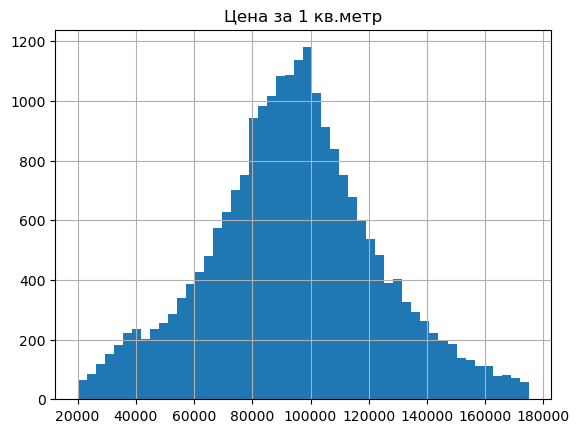

In [94]:
data_filtr3['price_metr'].hist(bins=50)
plt.title('Цена за 1 кв.метр')

In [95]:
# посмотрим числовое описание стл. "цена за 1 кв.м"
data_filtr3['price_metr'].describe()

count    22638.00
mean     94042.11
std      28957.91
min      20063.69
25%      76190.48
50%      94063.89
75%     111722.15
max     174932.61
Name: price_metr, dtype: float64

Из гистограммы видим, что наибольшее количество объектов недвижимости продаются по цене от 70 тыс.руб. до 120 тыс.руб. за 1 кв.м.

**4.5.2. Изучение влияния различных факторов на стоимость объекта**

Конкретизируем наши первоначальные гипотезы:
1) на стоимость объекта недвижимости наибольшее влияние оказывает общая площадь объекта: чем больше общая площадь объекта, тем соответственно выше стоимость объекта; характер связи сильный, положительный;

2) параметр "жилая площадь" является составляющей параметра "общая площадь", поэтому данный параметр будет иметь менее выраженный характер связи, положительный;

3) параметр "площадь кухни" является составляющей параметра "общая площадь", поэтому данный параметр будет иметь менее выраженный характер связи, положительный;

4) параметр "количество комнат" является составляющей частью "жилой площади": характер связи слабый, положительный;

5) параметр "расположение этажа": стоимость объекта, расположенного на первом или последнем этаже, будет меньше, чем стоимость объекта, расположенного на другом этаже: характер связи неопределен;

6) дата размещения объявления не оказывает влияния на стоимость объекта.


***Определение зависимости цены объекта от общей площади объекта***

Посмотрим числовое описание стл."цена за 1 кв.м" нашей выборки с помощью метода describe:

In [96]:
data_filtr3['price_metr'].describe()

count    22638.00
mean     94042.11
std      28957.91
min      20063.69
25%      76190.48
50%      94063.89
75%     111722.15
max     174932.61
Name: price_metr, dtype: float64

Из числового описания видим, что медианное и среднее значение цены за 1 кв.м. почти идентичны. Исходя из того, что в статистике при анализе рынка недвижимости используется величина "средняя цена за 1 кв.м", далее проанализируем нашу основную выборку по средней цене за 1 кв.м.

Для проверки первой гипотезы для начала определим минимальные и максимальные значения по стл."общая площадь":

In [97]:
print('Минимальная площадь объекта:', data_filtr3['total_area'].min())
print('Максимальная площадь объекта:', data_filtr3['total_area'].max()) 

Минимальная площадь объекта: 13.0
Максимальная площадь объекта: 590.0


Теперь посмотрим средние значения нашей выборки по параметрам - общая площадь, жилая площадь, площадь кухни, а также средняя стоимость объекта и средняя цена за 1 кв.м.

Для этого выборку сгруппируем по стандартной характеристике квартиры - количество комнат.

In [98]:
# Сгруппируем данные по стл."Количество комнат" - общее количество объектов с определенным количеством комнат
# посчитаем методом count() по стл.rooms;
# средние значения считаем методом mean() по другим стл.

data_grouped4=data_filtr3.groupby('rooms').agg({'rooms':'count',
                                                'total_area':'mean', 
                                                'living_area':'mean',
                                                'kitchen_area':'mean',
                                                'last_price':'mean',
                                                'price_metr':'mean'})

# для наглядности переименуем стл.:
data_grouped4 = data_grouped4.rename(columns={'rooms':'Кол-во объектов', 'total_area':'Сред.общая площадь', 
                                              'living_area':'Сред.жилая площадь', 'kitchen_area':'Сред.площадь кухни', 
                                              'last_price':'Сред.стоимость', 'price_metr':'Сред.цена за 1 кв.м'})

data_grouped4

,Кол-во объектов,Сред.общая площадь,Сред.жилая площадь,Сред.площадь кухни,Сред.стоимость,Сред.цена за 1 кв.м
rooms,,,,,,
0,194,27.52,18.88,NaN,2961508.51,107022.63
1,7855,37.50,17.85,9.49,3730470.35,98895.81
2,7603,55.17,31.53,9.71,5177645.55,91600.32
3,5484,75.91,46.68,10.85,7050424.09,89848.46
4,1069,102.42,64.10,12.88,10027501.92,93585.08
5,275,148.69,93.23,16.36,14785564.09,95965.97
6,88,188.88,127.51,20.24,18809088.64,99699.64
7,44,234.38,153.02,19.13,23309865.36,100769.43
8,9,240.08,152.00,21.34,22743333.33,95850.15


Из таблицы мы видим, что с увеличением общей площади увеличивается и стоимость объекта. 

Но цена за 1 кв.м варьирует и напрямую не зависит от увеличения общей площади объекта. Средняя цена за 1 кв.м. однокомнатной квартиры выше, чем 2,3,4-х комнатной. А средняя цена за 1 кв.м квартиры-студии с меньшей площадью даже выше, чем цена за 1 кв.м 7-комнатной квартиры с большей площадью.


<AxesSubplot:xlabel='total_area', ylabel='last_price'>

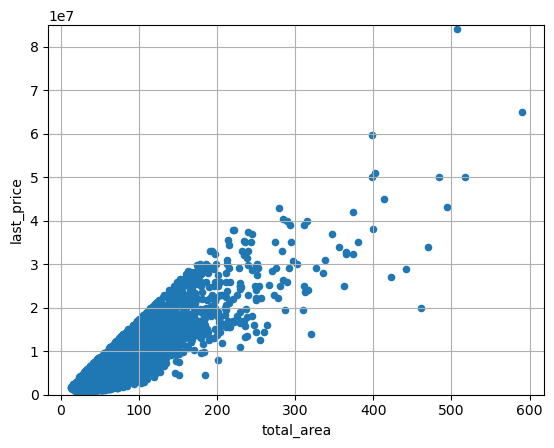

In [99]:
# построим диаграмму рассеяния для нашей выборки для определения зависимости между общей площадью и стоимостью объекта:

data_filtr3.plot(x='total_area', y='last_price', ylim=(0,85000000), kind='scatter', grid=True)

<AxesSubplot:xlabel='Сред.общая площадь'>

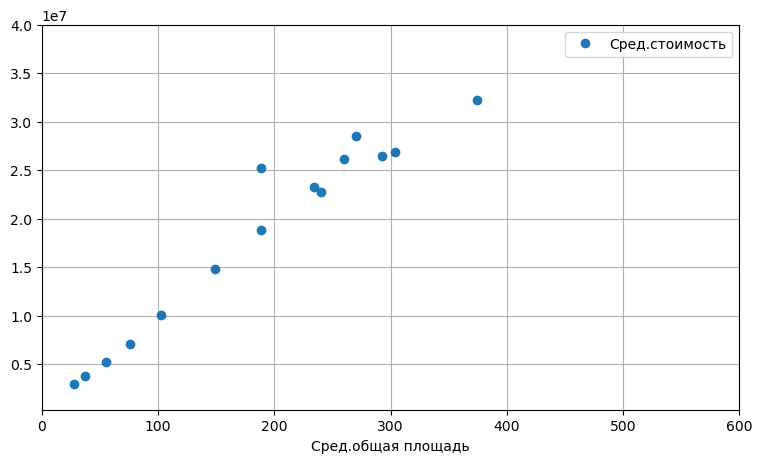

In [100]:
# построим график для табл.data_grouped4 (на средних величинах)
data_grouped4.plot(x='Сред.общая площадь', 
                 y='Сред.стоимость', 
                 style='o', 
                 xlim=(0,600),
                 ylim=(300000,40000000),
                 figsize=(9,5),
                 grid=True)

Из данных графиков видим линейную положительную связь между общей площадью и стоимостью объекта.

***Определение зависимости цены объекта от жилой площади объекта***


<AxesSubplot:xlabel='living_area', ylabel='last_price'>

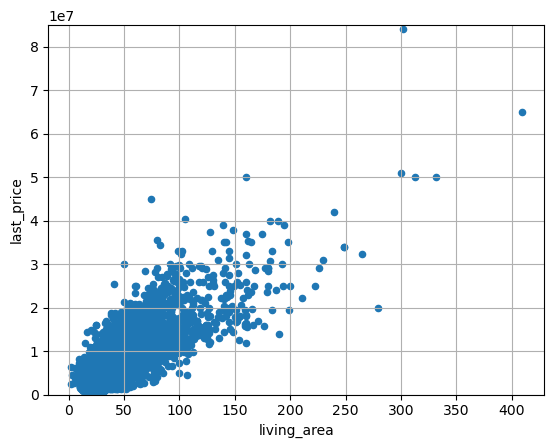

In [101]:
# построим диаграмму рассеяния для нашей выборки для определения зависимости между жилой площадью и стоимостью объекта:

data_filtr3.plot(x='living_area', y='last_price', ylim=(0,85000000), kind='scatter', grid=True)

<AxesSubplot:xlabel='Сред.жилая площадь'>

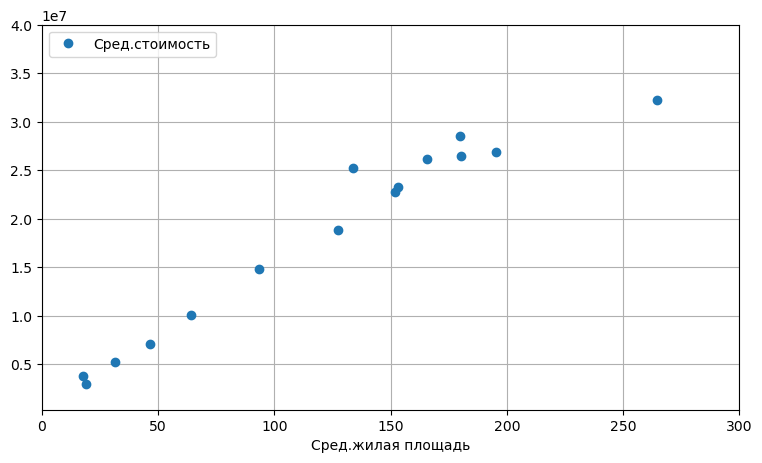

In [102]:
# построим график для табл.data_grouped4 (на средних величинах)
data_grouped4.plot(x='Сред.жилая площадь', 
                 y='Сред.стоимость', 
                 style='o', 
                 xlim=(0,300),
                 ylim=(300000,40000000),
                 figsize=(9,5),
                 grid=True)

Из данных графиков видим линейную положительную связь между жилой площадью и стоимостью объекта.

***Определение зависимости цены объекта от площади кухни объекта***

<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

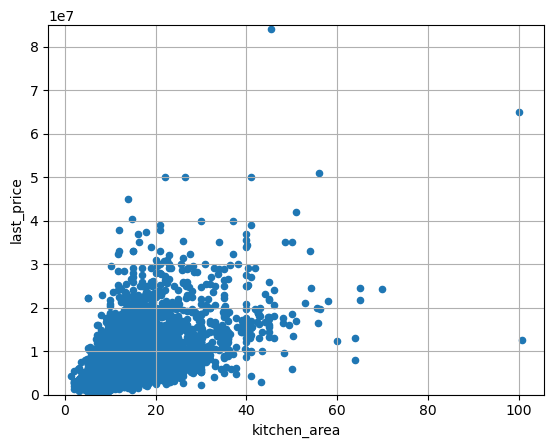

In [103]:
# построим диаграмму рассеяния для нашей выборки для определения зависимости между площадью кухни и стоимостью объекта:

data_filtr3.plot(x='kitchen_area', y='last_price', ylim=(0,85000000), kind='scatter', grid=True)

<AxesSubplot:xlabel='Сред.площадь кухни'>

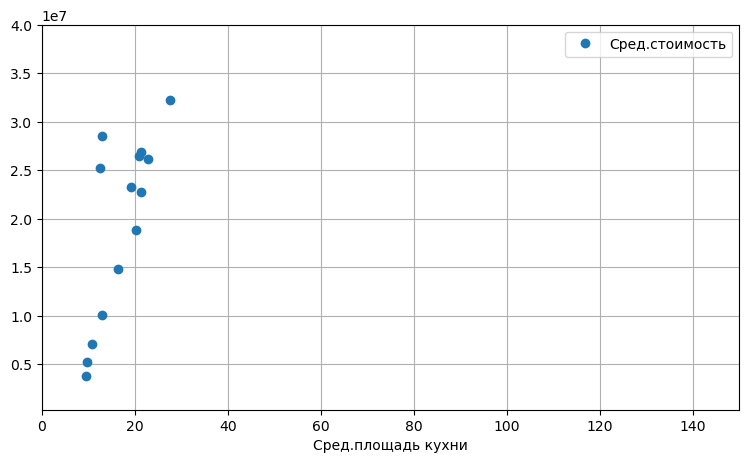

In [104]:
# построим график для табл.data_grouped4 (на средних величинах)
data_grouped4.plot(x='Сред.площадь кухни', 
                 y='Сред.стоимость', 
                 style='o', 
                 xlim=(0,150),
                 ylim=(300000,40000000),
                 figsize=(9,5),
                 grid=True)

Диаграмма рассеяния для величин "площадь кухни" и "стоимость объекта" больше растянута, выраженный линейный характер c крутым уклоном больше наблюдается для объектов с площадью кухни до 20 кв.м

Посмотрим коэффициенты корреляции Пирсона между величиной "стоимость объекта" и величинами "общая-жилая-площадь кухни".

In [105]:
print('Коэффициент корреляции Пирсона для величин "стоимость объекта"-"общая площадь": ',
      data_filtr3['last_price'].corr(data_filtr3['total_area']))
print('Коэффициент корреляции Пирсона для величин "стоимость объекта"-"жилая площадь": ',
      data_filtr3['last_price'].corr(data_filtr3['living_area']))
print('Коэффициент корреляции Пирсона для величин "стоимость объекта"-"площадь кухни": ',
      data_filtr3['last_price'].corr(data_filtr3['kitchen_area']))

Коэффициент корреляции Пирсона для величин "стоимость объекта"-"общая площадь":  0.857419519115451
Коэффициент корреляции Пирсона для величин "стоимость объекта"-"жилая площадь":  0.7691423293109975
Коэффициент корреляции Пирсона для величин "стоимость объекта"-"площадь кухни":  0.6146036922962557


Полученные коэффициенты корреляции подтверждают гипотезу, что на стоимость объекта наибольшее влияние оказывает общая площадь объекта, жилая площадь, менее выраженая связь - у площади кухни.

***Определение зависимости цены объекта от количества комнат***

<AxesSubplot:xlabel='rooms', ylabel='last_price'>

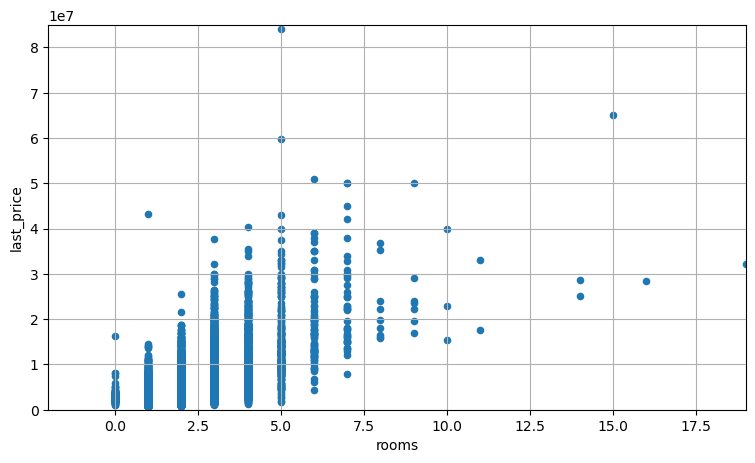

In [106]:
# построим диаграмму рассеяния для нашей выборки для определения зависимости между количеством комнат и стоимостью объекта:

data_filtr3.plot(x='rooms', y='last_price', xlim=(-2,19), ylim=(0,85000000), kind='scatter', grid=True, figsize=(9,5))

На этом графике мы наблюдаем уже другой нелинейный тип связи - стоимость объекта варьирует в пределах типа объекта с определенным количеством комнат.

Стоимость объекта увеличивается в пределах одного типа объекта с определенным количеством комнат при увеличении общей площади этого объекта.

В нашей таблице data_grouped4 видим увеличение стоимости объекта с увеличением количества комнат, но мы уже определили, что цена 1 кв.м не увеличивается вместе с увеличением общей площади объекта или с увеличением комнат у объекта.



In [107]:
# Сгруппируем данные по стл.type_room - общее количество объектов с количеством комнат посчитаем методом count() по стл.rooms;
# средние значения считаем методом mean() по другим стл.

data_grouped5=data_filtr3.groupby('type_room').agg({'type_room':'count',
                                                'total_area':'mean', 
                                                'living_area':'mean',
                                                'kitchen_area':'mean',
                                                'last_price':'mean',
                                                'price_metr':'mean'})

# для наглядности переименуем стл.:
data_grouped5 = data_grouped5.rename(columns={'type_room':'Кол-во объектов', 'total_area':'Сред.общая площадь', 
                                              'living_area':'Сред.жилая площадь', 'kitchen_area':'Сред.площадь кухни', 
                                              'last_price':'Сред.стоимость', 'price_metr':'Сред.цена за 1 кв.м'})

data_grouped5

,Кол-во объектов,Сред.общая площадь,Сред.жилая площадь,Сред.площадь кухни,Сред.стоимость,Сред.цена за 1 кв.м
type_room,,,,,,
1 комн.,7855,37.50,17.85,9.49,3730470.35,98895.81
2 комн.,7603,55.17,31.53,9.71,5177645.55,91600.32
3 комн.,5484,75.91,46.68,10.85,7050424.09,89848.46
4 комн.,1069,102.42,64.10,12.88,10027501.92,93585.08
более 4 комн.,433,173.28,111.87,17.91,17194415.47,97292.65
студия,194,27.52,18.88,NaN,2961508.51,107022.63


Видим, что самые высокие цены за 1 кв.м. наблюдается у квартир-студий, однокомнатных квартир.

Теперь посмотрим, как меняется цена за 1 кв.м в зависимости от выделенных нами типов объектов (с помощью метода pivot_table):

In [108]:
# по стл.type_flat, type_room группируем данные для таблицы 
# по значениям стл.total_area, living_area, kitchen_area, last_price, price_metr методом mean() 

data_pivot1 = data_filtr3.pivot_table(index=['type_flat', 'type_room'], 
                                      values=['rooms','last_price', 'total_area', 'price_metr'],
                                      aggfunc='mean')
data_pivot1.columns = ['Сред.стоимость','Сред.цена за 1 кв.м','Сред.кол-во комнат', 'Сред.общая площадь']

data_pivot1

,,Сред.стоимость,Сред.цена за 1 кв.м,Сред.кол-во комнат,Сред.общая площадь
type_flat,type_room,,,,
1 комн. maxi,1 комн.,4755477.97,103232.39,1.00,45.94
1 комн. mini,1 комн.,2330891.99,103317.47,1.00,22.54
1 комн. типовая,1 комн.,3346091.97,96997.06,1.00,34.42
2 комн. maxi,2 комн.,7617206.60,106746.32,2.00,70.79
2 комн. mini,2 комн.,2774817.76,75831.76,2.00,36.86
2 комн. типовая,2 комн.,4331349.35,86368.15,2.00,49.83
3 комн. maxi,3 комн.,10562237.53,106116.48,3.00,98.32
3 комн. mini,3 комн.,4419361.21,79229.46,3.00,55.79
3 комн. типовая,3 комн.,5870226.38,83646.15,3.00,69.93


Из данной таблицы видим, что цена за 1 кв.м варьирует в зависимости от типа квартиры (maxi - большой метраж, mini - маленький метраж, типовая - стандартный метраж) в пределах объекта с одинаковым количеством комнат: maxi - выше цена, mini - ниже цена. Но в тоже время, такая зависимость не характерна для однокомнатных квартир, квартир-студий - здесь, чем меньше общая площадь, тем выше цена. 

<AxesSubplot:xlabel='Сред.кол-во комнат'>

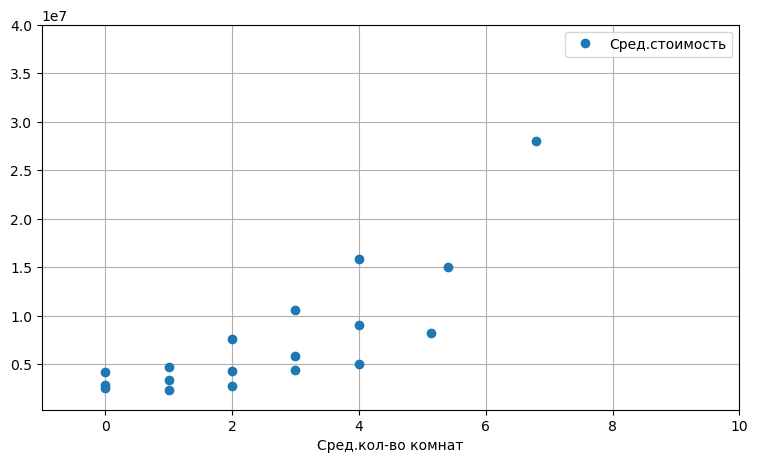

In [109]:
# построим график для табл.data_pivot1 (на средних величинах)
data_pivot1.plot(x='Сред.кол-во комнат', 
                 y='Сред.стоимость', 
                 style='o', 
                 xlim=(-1,10),
                 ylim=(300000,40000000),
                 figsize=(9,5),
                 grid=True)

График для средней стоимости объекта и количество комнат совпадает с диаграммой рассеяния для нашей выборки (т.к.мы укрупняли объекты по количеству комнат и делали группу с характеристикой от 4 и более комнат - на графике имеется отличие для этой группы).

In [110]:
print('Коэффициент корреляции Пирсона для величин "стоимость объекта"-"количество комнат": ',
      data_filtr3['last_price'].corr(data_filtr3['rooms']))
print('Коэффициент корреляции Пирсона для величин "цена за 1 кв.м"-"количество комнат": ', 
      data_filtr3['price_metr'].corr(data_filtr3['rooms']))

Коэффициент корреляции Пирсона для величин "стоимость объекта"-"количество комнат":  0.5863333124329646
Коэффициент корреляции Пирсона для величин "цена за 1 кв.м"-"количество комнат":  -0.08839550417666325


Средний положительный коэффициент корреляции Пирсона между стоимостью объекта и количеством комнат характеризует о наличии между величинами линейной связи. Между ценой за 1 кв.м. и количеством комнат линейная связь отсутствует.

***Определение зависимости цены объекта от типа этажа, на котором расположен объект***

Сгруппируем объекты недвижимости по типу их расположения на этаже в доме:

In [111]:
# Сгруппируем данные по стл."Тип этажа" - общее количество объектов с определенным количеством комнат
# посчитаем методом count() по стл.rooms;
# средние значения считаем методом mean() по другим стл.

data_grouped6=data_filtr3.groupby('type_floor').agg({'floor':'count',
                                               'last_price':'mean',
                                                'price_metr':'mean'})

# для наглядности переименуем стл.:
data_grouped6 = data_grouped6.rename(columns={'floor':'Кол-во объектов по этажам', 
                                              'last_price':'Сред.стоимость', 'price_metr':'Сред.цена за 1 кв.м'})

data_grouped6

,Кол-во объектов по этажам,Сред.стоимость,Сред.цена за 1 кв.м
type_floor,,,
другой,16601,5746170.77,97717.92
неизвестно,79,6757091.22,105135.68
первый,2817,4554494.18,80595.93
последний,3141,5512932.89,86394.70


Из таблицы мы видим, что средняя стоимость объекта, расположенного на первом этаже дома, ниже, чем у других объектов;
средняя стоимость объекта, расположенного на последнем этаже выше по сравнению с первым, но ниже чем у объектов, расположенных на другом этаже.

Но мы также видим, следующее:
 - количество объектов, расположенных на первом этаже, равно 2817 (доля от общего количества выборки составляет 12%);
 - количество объектов, расположенных на последнем этаже, равно 3141 (доля от общего количества выборки составляет 14%);
 - значительное количество объектов, расположенных на "другом этаже", равно 16601 (доля от общего количества выборки составляет 73%). 
 Такая большая доля объектов в свою очередь влияет на показатель средней стоимости объекта.


<AxesSubplot:xlabel='type_floor', ylabel='last_price'>

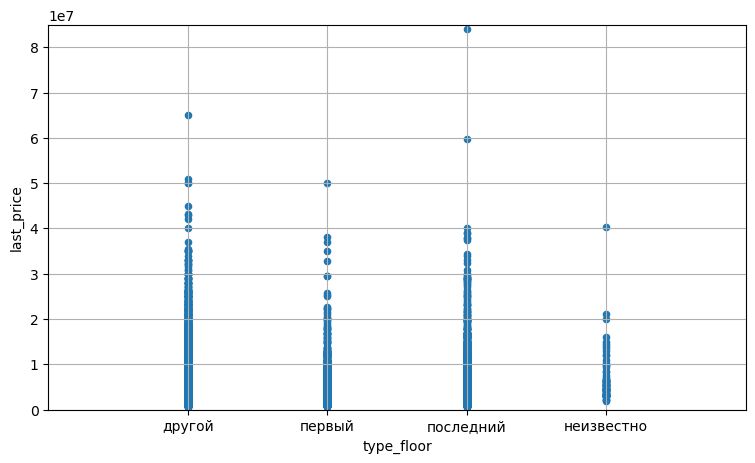

In [112]:
# построим диаграмму рассеяния для нашей выборки для определения зависимости между этажем и стоимостью объекта:

data_filtr3.plot(x='type_floor', y='last_price', xlim=(-1,4), ylim=(0,85000000), kind='scatter', grid=True, figsize=(9,5))

<AxesSubplot:xlabel='floor', ylabel='last_price'>

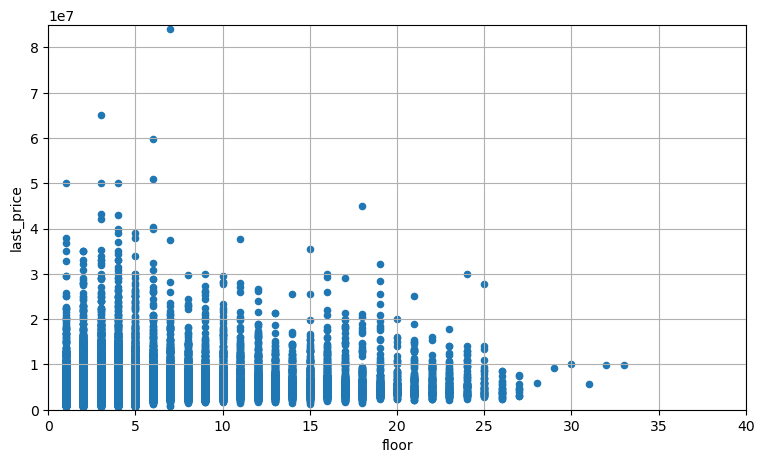

In [113]:
# построим диаграмму рассеяния для нашей выборки для определения зависимости между этажем и стоимостью объекта:

data_filtr3.plot(x='floor', y='last_price', xlim=(0,40), ylim=(0,85000000), kind='scatter', grid=True, figsize=(9,5))

Диаграмма рассеяния между величинами "стоимость объекта" и "тип этажа", на котором расположен объект (как и в целом, диаграмма рассеяния для параметра "этаж"), имеет такой же тип, как и диаграмма рассеяния для параметра "количество комнат".

Это позволяет сделать следующий вывод: действительно имеется гораздо меньший спрос на объекты недвижимости, расположенные либо на первом, либо на последнем этаже, что отражается на меньшей средней стоимости объекта. Учитывая эту особенность на рынке недвижимости, при застройке закладывается некий дисконт на квартиры, расположенные на первом этаже с целью увеличения спроса, и в тоже время устанавливается наценка на более высокие этажи (в современных домах на последних этажах могут размещаться большие двухуровневые квартиры и т.п.).   

***Определение зависимости цены объекта от даты размещения объявления***

<AxesSubplot:xlabel='weekday'>

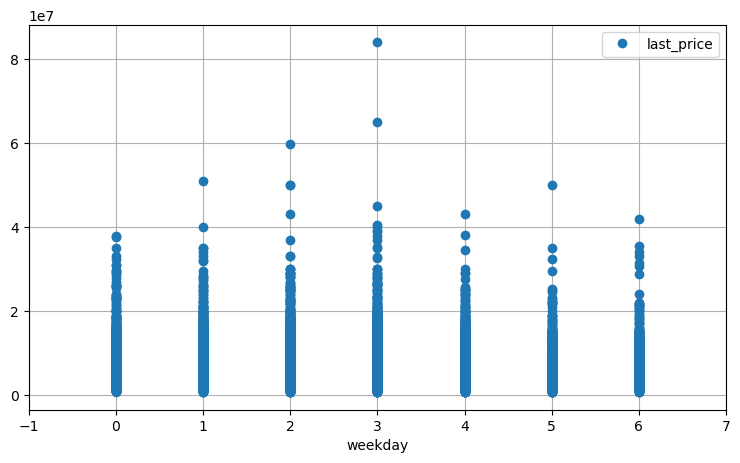

In [114]:
# построим график для даты размещения публикации:
data_filtr3.plot(x='weekday', 
                 y='last_price', 
                 style='o', 
                 xlim=(-1,7),
                 figsize=(9,5),
                 grid=True)

<AxesSubplot:xlabel='month_exp'>

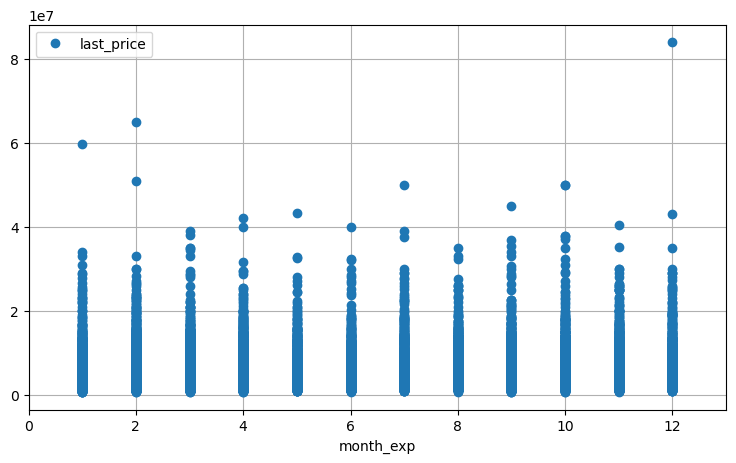

In [115]:
# построим график для месяца размещения публикации:
data_filtr3.plot(x='month_exp', 
                 y='last_price', 
                 style='o', 
                 xlim=(0,13),
                 figsize=(9,5),
                 grid=True)

<AxesSubplot:xlabel='year_exp'>

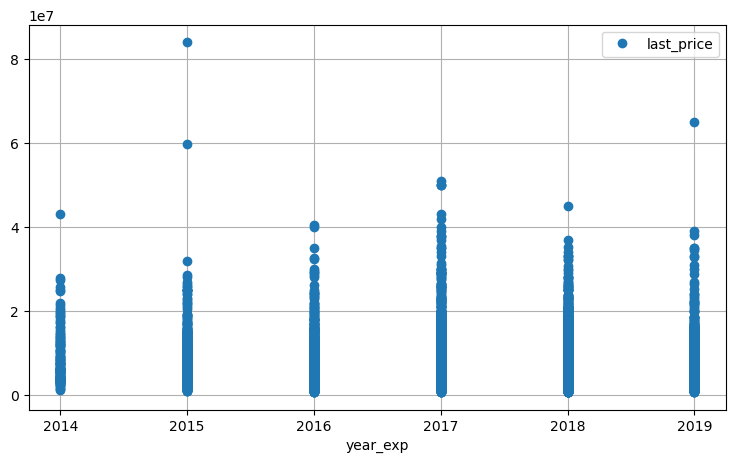

In [116]:
# построим график для года размещения публикации:
data_filtr3.plot(x='year_exp', 
                 y='last_price', 
                 style='o', 
                 figsize=(9,5),
                 grid=True)

Графики, построенные для даты, месяца, года размещения публикации, по типу идентичны и похожи на гистограмму. Эти графики показывают, что каждый день недели, каждый месяц на протяжении с 2014 по 2019 гг. на ресурсе размещались объявления о продаже квартир. Никакой зависимости стоимости объекта от даты, месяца или года размещения нет.



***Определение зависимости цены объекта от расстояния до центра города***

При рассмотрении данных по этому стл. в пункте 4.2.2 мы выделяли отдельно срез по объектам недвижимости, в объявлениях о продаже которых было указано расстояние до центра города, делали таблицу с распределением и количеством таких объектов недвижимости по населенным пунктам (переменная data_CityCentr).

По данной таблице видно, что в основном такой параметр как "расстояние до центра города" присутствует в объявлениях о продаже объектов недвижимости, расположенных в городской местности, либо в других населенных пунктах, близко расположенных к городам.
Также определили верхнюю границу нормального размаха по данному стл., за пределами которого наблюдаются выбросы, равную 26 км.


<AxesSubplot:xlabel='cityCentr_km', ylabel='price_metr'>

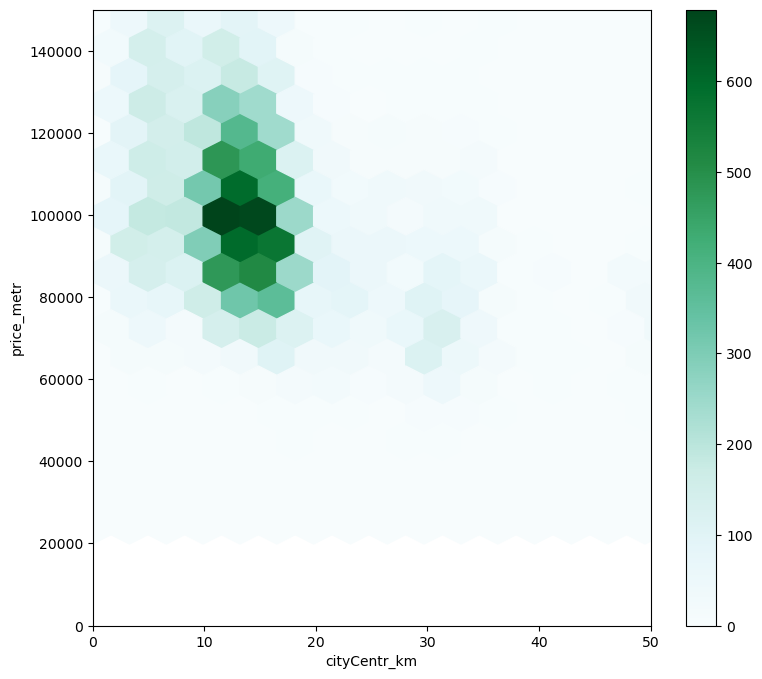

In [117]:
# построим график для стл."расстояние до центра города (км)"
data_filtr3.plot(x='cityCentr_km', 
                 xlim=(0,50),
                 y='price_metr', 
                 ylim=(0,150000),
                 kind='hexbin', gridsize=20, figsize=(9,8), sharex=False)

Из этого графика видим, что наибольшее значение объектов недвижимости с ценой за 1 кв.м. в пределах от 80 тыс.руб. 120 тыс.руб. находится на расстоянии от центра города в диапазоне от 10-20 км. 

In [118]:
print('Коэффициент корреляции для величин "цена за 1 кв.м" - "расстояние до центра города":',
     data_filtr3['cityCentr_km'].corr(data_filtr3['price_metr']))

Коэффициент корреляции для величин "цена за 1 кв.м" - "расстояние до центра города": -0.39760539359506536


Коэффициент корреляции показывает наличие слабой отрицательной связи между этими величинами: чем больше расстояние до центра города, тем меньше цена за 1 кв.м.

**4.6. Определение населенных пунктов с самой высокой и с самой низкой стоимостью 1 кв.м**

In [119]:
# с помощью метода groupby() сгруппируем объекты недвижимости нашей выборки по названию населенных пунктов
# методом count() посчитаем общее количество объявлений по стл."тип населенного пункта"
# отсортируем по убыванию и выведим 10 первых наименований

temp = data_filtr3.groupby('locality_name')['type_locality'].count()
temp.sort_values(ascending=False).head(10)

locality_name
Санкт-Петербург      14886
поселок Мурино         556
поселок Шушары         440
Всеволожск             397
Пушкин                 366
Колпино                338
поселок Парголово      327
Гатчина                304
деревня Кудрово        299
Выборг                 236
Name: type_locality, dtype: int64

In [120]:
# сохраним полученный список 
spisok = ['Санкт-Петербург', 'поселок Мурино', 'поселок Шушары', 'Всеволожск', 'Пушкин', 'Колпино', 
         'поселок Парголово', 'Гатчина', 'деревня Кудрово', 'Выборг']

# в переменную data_locality1 помещаем строки из data_filtr3 по населенным пунктам, указанным в переменной spisok;
# c помощью сводной таблицы рассчитаем среднюю цену за 1 кв.м в населенном пункте
# отсортируем населенные пункты по убыванию цены за 1 кв.м

data_locality1 = data_filtr3.query('locality_name in @spisok').pivot_table(index='locality_name',
                                                                          values='price_metr',
                                                                          aggfunc='mean').sort_values(by='price_metr',
                                                                                                     ascending=False)
data_locality1.columns = ['Средняя цена 1 кв.м']

data_locality1

,Средняя цена 1 кв.м
locality_name,
Санкт-Петербург,106700.75
Пушкин,102148.21
деревня Кудрово,92473.55
поселок Парголово,90175.91
поселок Мурино,85681.76
поселок Шушары,78677.36
Колпино,75424.58
Гатчина,69294.60
Всеволожск,67214.25


Среди населенных пунктов самая высокая средняя цена за 1 кв.м (по убыванию) наблюдается в: 
г. Санкт-Петербург, г. Пушкин, г. Кудрово, пос. Парголово, г. Мурино.

In [121]:
# c помощью сводной таблицы рассчитаем среднюю цену за 1 кв.м в населенном пункте
# отсортируем населенные пункты по убыванию средней цены за 1 кв.м

data_locality2 = data_filtr3.pivot_table(index='locality_name',
                                         values='price_metr',
                                         aggfunc='mean').sort_values(by='price_metr', ascending=True)
data_locality2.head(10)

,price_metr
locality_name,
поселок Серебрянский,20454.55
поселок городского типа Никольский,20847.82
деревня Кисельня,20909.09
поселок Плоское,20912.55
деревня Тихковицы,21126.76
Бокситогорск,21198.85
поселок Оредеж,21995.46
поселок Торковичи,22089.03
поселок Алексеевка,22222.22


Среди населенных пунктов самая низкая средняя цена за 1 кв.м наблюдается в: пос. Серебрянский, пгт Никольский, д.Кисельня, пос.Плоское, д.Тихковицы.

**4.7. Определение зависимости цены 1 кв.м от расстояния до центра города для объектов недвижимости г.Санкт-Петербурга**

In [122]:
# создадим переменную data_spb, в которую сохраним срез по стр.по объектам недвижимости г. Санкт-Петербурга;
# с помощью сводной табл. посмотрим среднюю цену 1 кв.м. по км по стл.расстояние до центра города

data_spb = data_filtr3.query('locality_name == "Санкт-Петербург"')
data_spb1 = data_spb.pivot_table(index='cityCentr_km', 
                                values='price_metr',
                                aggfunc='mean').reset_index().sort_values(by='cityCentr_km')
data_spb1.head(30)

,cityCentr_km,price_metr
0,0.00,114951.90
1,1.00,119352.94
2,2.00,112599.22
3,3.00,110131.07
4,4.00,114929.99
5,5.00,118807.56
6,6.00,120811.36
7,7.00,118440.71
8,8.00,118939.73
9,9.00,108574.55


<AxesSubplot:xlabel='cityCentr_km'>

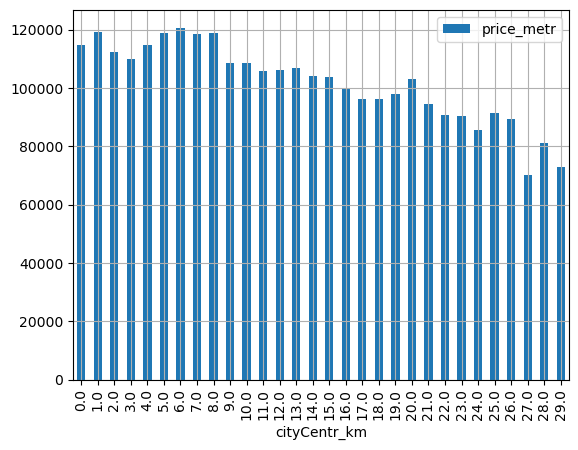

In [123]:
data_spb1.plot(x='cityCentr_km', kind='bar', grid=True)


<AxesSubplot:xlabel='cityCentr_km'>

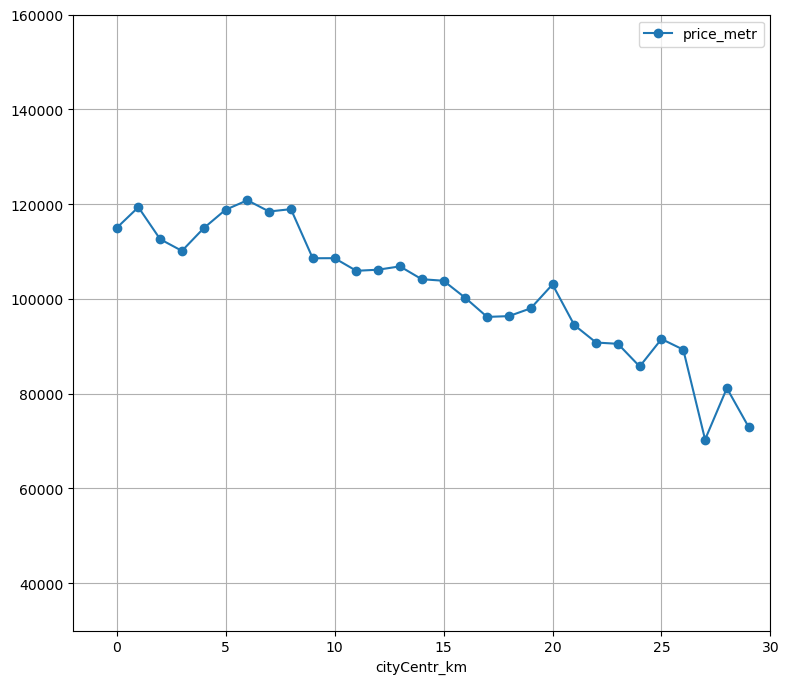

In [124]:
data_spb1.plot(x='cityCentr_km',
              xlim=(-2,30),
              y='price_metr',
              ylim=(30000,160000),
              style='o-',
              figsize=(9,8),
              grid=True)

На полученных графиках прослеживается отрицательная связь между ценой за 1 кв.м и расстоянием до центра города для объектов недвижимости, расположенных в Санкт-Петербурге: чем меньше расстояние до центра города, тем выше цена за 1 кв.м.

In [125]:
# коэффициент корреляции Пирсона:
data_spb['price_metr'].corr(data_spb['cityCentr_km'])

-0.2866780531962265

Коэффициент корреляции Пирсона показывает на наличие слабой отрицательной связи между ценой за 1 кв.м и расстоянием до центра города для объектов недвижимости Санкт-Петербург. 

### Общий вывод

**В рамках исследования объявлений о продаже квартир проведены следующие этапы:**

**5.1. Предобработка данных:**

На данном этапе:
    
   - изучен датасет, сделано описание основных столбцов с указанием имеющихся пропусков и возможных причин их появления;
   - построена общая гистограмма для всех числовых столбцов;
   - обработаны строки с пропущенными и аномальными значениями в столбцах: удалены строки с пропущенными значениями в наименованиях населенных пунктов, устранены аномальные значения по столбцам, либо приведены пояснения по сохранению значений в столбцах; по некоторым столбцам пропущенные значения заменены;
   - по некоторым столбцам проведено изменение типа данных;
   - проверены уникальные значения по столбцам и проведена корректировка данных;
   - в датасет добавлены новые столбцы в соответствии с описанием проектной работы, а также другие столбцы для дальнейшего анализа.


**5.2. Исследовательский анализа данных:**

**5.2.1 на данном этапе проанализарованы все основные параметры и характеристики объекта недвижимости:**

 
***проведен анализ основных параметров, характеризующих объект недвижимости:*** общая площадь объекта, жилая площадь объекта, площадь кухни, количество комнат, высота потолка, этаж, тип расположения этажа.
 
   - по всем параметрам построены гистограммы, к некоторым параметрам дополнительно построены диаграммы размаха, приведено числовое описание столбцов;
   - сформированы гипотезы о влиянии указанных параметров на стоимость объекта;
   - дополнительно созданы новые столбцы путем укрупнения данных (например, типы квартир по количеству комнат, типизация объектов недвижимости по двум параметрам - количество комнат и общая площадь).
 
***проведен анализ картографических параметров, характеризующих объект недвижимости:*** расстояние до центра города, расстояние до ближайшего аэропорта, расстояние до бдижайшего водоема, парка.
 
   -  аналогично по всем параметрам построены гистограммы;
   -  проанализирована выборка по объектам недвижимости, в информации о продаже которых были указаны вышеперечисленные параметры;
   -  сделаны предположения о возможной связи между параметрами и стоимостью объекта.
 
***проведен анализ характеристики - день, месяц и количество дней публикации:*** построены соответствующие гистограммы, сформулирован вывод.
 
***проведен анализ параметра "стоимость объекта" и "цена за 1 кв.м":***
 
   - построены гистограммы, диаграммы размаха, приведено числовое описание столбцов;
   - изучены объекты недвижимости с макимальным и минимальным значениями по этому параметру.

 
**5.2.2. Установлено следующее:**
   
   В датасете числится 23650 объектов недвижимости:
   
   - по параметру "общая площадь" преобладают объекты недвижимости площадью от 40 до 70 кв.м. Медианное значение - чуть более 50 кв.м. Также имеютя объекты с большей площадью, т.н. "выбросы" за отметкой нормального размаха в 110 кв.м.
     
   - по параметру "жилая площадь" - преобладают объекты с жилой площадью от 17 до 50 кв.м.
 
   - по параметру "площадь кухни" - с площадью от 6 до 15 кв.м. 
   
     
   - также прослеживается наличие определенных типов квартир: 
   
       с общей площадью около 30-34 кв.м. - 40-44 кв.м - 54 кв.м.
       
       с жилой площадью около 18 кв.м. - 30 кв.м. - 42 кв.м.
       
       с площадью кухни около 6 кв.м. - 9 кв.м - 10 кв.м.
    
    
   - наличие квартир с различным соотношением общей площади-жилой площади - площади кухни обусловлено различными типами застройки;
   
   - в датасете преобладают 1,2,3 комнатные квартиры; большинство объектов недвижимости расположены на средних этажах.
   
По картографическим характеристикам установлено, что в датасете у 78% объектов указана такая характеристика "как расстояние до центра города" и "расстояние до ближайшего аэоропорта", у 40% объектов - указана характеристика "расстояние до ближайшего парка, водоема". Подобные характеристики присущи не ко всем объектам недвижимости, поэтому по этим столбцам наблюдаем большое количество пропусков.
   - по параметру "расстояние до центра города": в основном указаны объекты на расстоянии до 20 км;
   - по парамтеру "расстояние до ближайшего аэропорта": указаны объекты на расстоянии до 40 км;
   - по параметру "расстояние до ближаешйго парка, водоема": указаны объекты, располагающиеся в шаговой доступности до локаций (до 800м).
   
По цене объекта: 
   - наибольшее количество объектов представлено по цене от 3 млн.руб. до 7 млн.руб.; выбросы наблюдаются за пределами нормального размаха в отметке более 12 млн.руб.;
   - наибольшее количество объектов недвижимости продается по цене за 1 кв.м. в диапазоне от 75 тыс.руб. до 120 тыс.руб.; диапазон нормального размаха по этому параметру составляет от 20 тыс.руб. до 175 тыс.руб.

 

**5.2.2. проведена обработка датасета на предмет исключения выбросов:**
  
   




 

*проанализированы объекты недвижимости с низкими значениями по стл."цена за 1 кв.м" (менее 20 тыс.руб.);*

*проанализированы объекты недвижимости с высокими значениями по стл."цена за 1 кв.м" (более 175 тыс.руб.);*

*проанализированы объекты недвижимости с нормальными значениями по стл."цена за 1 кв.м" (от 20 тыс.руб. до 175 тыс.руб.).*

   Для дальнейшего анализа и изучения факторов, наиболее влияющих на стоимость объекта, взят срез по датасету с нормальными значениями по параметру "цена за 1 кв.м".
   
   В итоге в выборку для дальнейшего анализа включены 22638 объекта:

   - минимальная стоимость объекта - 630 тыс.руб.;

   - максимальная стоимость объекта - 84 млн. руб.;

   - средняя стоимость - 5,6 млн.руб.;

   - медианное значение стоимости - 4,6 млн.руб.

**5.2.3. проведен анализ влияния различных факторов на стоимость объекта:**

Обозначены гипотезы для анализа:

1) на стоимость объекта недвижимости наибольшее влияние оказывает общая площадь объекта: чем больше общая площадь объекта, тем соответственно выше стоимость объекта; характер связи сильный, положительный;

2) параметр "жилая площадь" является составляющей параметра "общая площадь", поэтому данный параметр будет иметь менее выраженный характер связи, положительный;

3) параметр "площадь кухни" является составляющей параметра "общая площадь", поэтому данный параметр будет иметь менее выраженный характер связи, положительный;

4) параметр "количество комнат" является составляющей частью "жилой площади": характер связи слабый, положительный;

5) параметр "расположение этажа": стоимость объекта, расположенного на первом или последнем этаже, будет меньше, чем стоимость объекта, расположенного на другом этаже: характер связи неопределен;

6) дата размещения объявления не оказывает влияния на стоимость объекта.

Для всех параметров построены диаграммы рассеяния, графики, по возможности просчитаны коэффициенты корреляции.

Установлено следующее:
   - наибольшее влияние на стоимость объекта недвижимости оказывает общая площадь объекта, далее - жилая площадь объекта, площадь кухни: при увеличении этих параметров, увеличиваестя стоимость объекта;
   - отмечается положительная связь между стоимостью и количеством комнат: стоимость объекта увеличивается в пределах одного типа объекта с определенным количеством комнат при увеличении общей площади этого объекта;
   - цена 1 кв.м не увеличивается вместе с увеличением общей площади объекта или с увеличением комнат у объекта - высокая цена за 1 кв.м наблюдается у однокомнатных квартир, квартир-студий;
   - стоимость квартир, расположенных на первом или последнем этаже, ниже чем у квартир, расположенных на средних этажах. Пониженный спрос на такие квартиры, незначительная доля таких объектов приводит к меньшей средней стоимости объектов. Во многом стоимость квартиры определяется типом застройки. Условный характер связи между типом расположения этажа и стоимостью объекта определяется также ценовой политикой застройщика.
   - дата размещения объявления не оказывает влияния на стоимость объекта недвижимости.
   
   
  

**5.2.4. определены населенные пункты с самой высокой и самой низкой ценой за 1 кв.м.:**


Населенные пункты с самой высокой средней ценой за 1 кв.м: г. Санкт-Петербург, г. Пушкин, г. Кудрово, пос. Парголово, г. Мурино.

Населенные пункты с самой низкой средней ценой за 1 кв.м: пос. Серебрянский, пгт Никольский, д.Кисельня, пос.Плоское, д.Тихковицы.

**5.2.5. определена зависимость цены 1 кв.м от расстояния до центра города для объектов недвижимости г.Санкт-Петербурга:**

На построенных графиках отмечается отрицательная связь между ценой за 1 кв.м и расстоянием до центра города для объектов г. Санкт-Петербурга: чем меньше расстояние до центра города, тем выше цена за 1 кв.м. В тоже время коэффициент корреляции Пирсона показывает на наличие слабой отрицательной связи между этими величинами.